# **Proyecto 4**

# **Procesamiento del Lenguaje Natural de opiniones de usuarios en Amazon**

## Dataset: The Multilingual Amazon Reviews Corpus

**Descarga el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**



# **Tabla de contenidos**
>1. Exploración de datos
>2. Visualización de datos
>3. Normalización de texto
>4. Objetivos

# **1 Exploración de datos**

**Importamos las librerias**

Libreria para identificar emojis en textos

In [ ]:
!pip install emoji

Libreria que contiene una lista de emojis para mapearlos en un corpus

In [ ]:
!pip install emot

Libreria para analizar sentimientos de un texto (positivo, neutro, negativo)

In [ ]:
!pip install sentiment_analysis_spanish

In [ ]:
import pandas as pd #Sirve para guardar datos en un dataframe y manipularlos
import numpy as np #Sirve para facilitar la manipulacion de datos numericos
import matplotlib.pyplot as plt #Libreria para hacer graficas
import seaborn as sns #Extension de matplotlib para hacer graficas mas elegantes
import emoji 
import re #Libreria para imponer expresiones regulares
import itertools #Libreria para ligerar las iteraciones
from tqdm import tqdm #Muestra una barra de progreso para as celdas que tardan en ejecutarse
from wordcloud import WordCloud #Libreria para graficar nube de palabras
from emot.emo_unicode import UNICODE_EMO, EMOTICONS #listas de emoticones

from sentiment_analysis_spanish import sentiment_analysis #Para analizar sentimientos en textos

import nltk #Kit para trabajar con dataset textuales, procesarlos y manipularlos
nltk.download("wordnet")
nltk.download("punkt")
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Carga de datos**

In [ ]:
df_train = pd.read_json("https://amazon-reviews-ml.s3-us-west-2.amazonaws.com/json/train/dataset_es_train.json", lines=True)
df_test = pd.read_json("https://amazon-reviews-ml.s3-us-west-2.amazonaws.com/json/test/dataset_es_test.json", lines=True)
df_dev = pd.read_json("https://amazon-reviews-ml.s3-us-west-2.amazonaws.com/json/dev/dataset_es_dev.json", lines=True)

In [ ]:
print("Train:",df_train.shape)
print("Test:",df_test.shape)
print("Dev:",df_dev.shape)

Train: (200000, 8)
Test: (5000, 8)
Dev: (5000, 8)


**Definiendo nuevas variables para analizar los datasets**

In [ ]:
lista_df = [df_dev, df_test, df_train]

**Longitud de cuerpo de comentario**

In [ ]:
def text_length(df):
    df['text_length'] = df['review_body'].apply(len)
    return df

In [ ]:
for i in tqdm(lista_df):
    text_length(i)

100%|██████████| 3/3 [00:00<00:00, 28.26it/s]


**Concatenación de titulo y cuerpo de comentarios**

In [ ]:
def full_text(df):
    df['full_text'] = df[['review_title', 'review_body']].apply(' . '.join, axis = 1)
    return df

In [ ]:
for i in tqdm(lista_df):
    full_text(i)

100%|██████████| 3/3 [00:04<00:00,  1.61s/it]


### **Stopwords**

Las stopwords son palabras que no tienen un significado por si solas, sino que modifican o acompañan a otras, este grupo suele estar conformado por artículos, pronombres, preposiciones, adverbios e incluso algunos verbos.

En el procesamiento de datos en lenguaje natural son filtradas antes o después del proceso en si, no considerandolos por su nulo significado.

Vamos a usar una lista más completa de stopwords de stopword_json.
https://github.com/6/stopwords-json

También incluimos signos de puntuación.

In [ ]:
stopwords_json_es = ["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún",
                           "alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello",
                           "aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún",
                           "b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro",
                           "comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra",
                           "cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto",
                           "cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde",
                           "despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos",
                           "durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima",
                           "encuentra","enfrente","enseguida","entonces","entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban",
                           "estado","estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex","excepto","existe","existen",
                           "explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general","gran","grandes","gueno","h","ha","haber","habia","habla","hablan",
                           "habrá","había","habían","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos",
                           "hicieron","hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas",
                           "intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera",
                           "manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo",
                           "mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno",
                           "ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra",
                           "otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis",
                           "podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera",
                           "primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo",
                           "pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado",
                           "realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según",
                           "seis","ser","sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente",
                           "solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","sé","sí","sólo","t","tal","tambien","también","tampoco","tan",
                           "tanto","tarde","te","temprano","tendrá","tendrán","teneis","tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda",
                           "todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres",
                           "tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted",
                           "ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy",
                           "vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último",
                           "últimos"]

stopwords_json_es = set(stopwords_json_es)
stopwords_nltk_es = set(stopwords.words('spanish'))
stopwords_punct = set(punctuation)

# Combine the stopwords.
stopwords = set.union(stopwords_json_es, stopwords_nltk_es)
stoplist_combined = set.union(stopwords_json_es, stopwords_nltk_es, stopwords_punct)

**Contador de stopwords**

In [ ]:
def stop_word_count(df):
    df['stop_word_count'] = df['full_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))

In [ ]:
for i in tqdm(lista_df):
    stop_word_count(i)

100%|██████████| 3/3 [00:03<00:00,  1.15s/it]


**Contador de caracteres**

In [ ]:
def char_count(df):
    df['char_count'] = df['full_text'].apply(lambda x: len(str(x)))

In [ ]:
for i in tqdm(lista_df):
    char_count(i)

100%|██████████| 3/3 [00:00<00:00, 12.24it/s]


**Promedios de longitud de palabras**

In [ ]:
def mean_word_length(df):
    df['mean_word_length'] = df['full_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
for i in tqdm(lista_df):
    mean_word_length(i)

100%|██████████| 3/3 [00:04<00:00,  1.64s/it]


**Signos de exclamacion**

In [ ]:
def exclamation_count (df):
    df['exclamation_count'] = df['full_text'].apply(lambda x: len([c for c in str(x) if c == '!']))

In [ ]:
for i in tqdm(lista_df):
    exclamation_count(i)

100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


**Contador de puntuaciones**

In [ ]:
def punctuation_count (df):
    df['punctuation_count'] = df['full_text'].apply(lambda x: len([c for c in str(x) if c in stopwords_punct]))

In [ ]:
for i in tqdm(lista_df):
    punctuation_count(i)

100%|██████████| 3/3 [00:02<00:00,  1.32it/s]


**Contador de palabras en mayuscula**

In [ ]:
def uppercase_count(df):
    df['uppercase_count'] = df['full_text'].apply(lambda x: sum(map(str.isupper,x.split())))

In [ ]:
for i in tqdm(lista_df):
    uppercase_count(i)

100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


**Emojis**

In [ ]:
def emoji_retriever(df):
    df["emojis"] = df["full_text"].apply(lambda x: [c for c in str(x) if c in UNICODE_EMO])

In [ ]:
for i in tqdm(lista_df):
    emoji_retriever(i)

100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


**Analisis de sentimientos**

In [ ]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
def sentiment_analysis(df):
    df["sentiment"] = df["full_text"].apply(lambda x: sentiment.sentiment(x))

In [ ]:
for i in tqdm(lista_df):
    sentiment_analysis(i)

100%|██████████| 3/3 [01:28<00:00, 29.49s/it]


**Valores faltantes**

In [ ]:
print("Valores faltantes en train:")
print("="*32)
print(df_train.isnull().sum())
print("Valores faltantes en test:")
print("="*32)
print(df_test.isnull().sum())
print("Valores faltantes en dev:")
print("="*32)
print(df_dev.isnull().sum())

Valores faltantes en train:
review_id            0
product_id           0
reviewer_id          0
stars                0
review_body          0
review_title         0
language             0
product_category     0
text_length          0
full_text            0
stop_word_count      0
char_count           0
mean_word_length     0
exclamation_count    0
punctuation_count    0
uppercase_count      0
emojis               0
sentiment            0
dtype: int64
Valores faltantes en test:
review_id            0
product_id           0
reviewer_id          0
stars                0
review_body          0
review_title         0
language             0
product_category     0
text_length          0
full_text            0
stop_word_count      0
char_count           0
mean_word_length     0
exclamation_count    0
punctuation_count    0
uppercase_count      0
emojis               0
sentiment            0
dtype: int64
Valores faltantes en dev:
review_id            0
product_id           0
reviewer_id        

# **2 Visualización de datos**

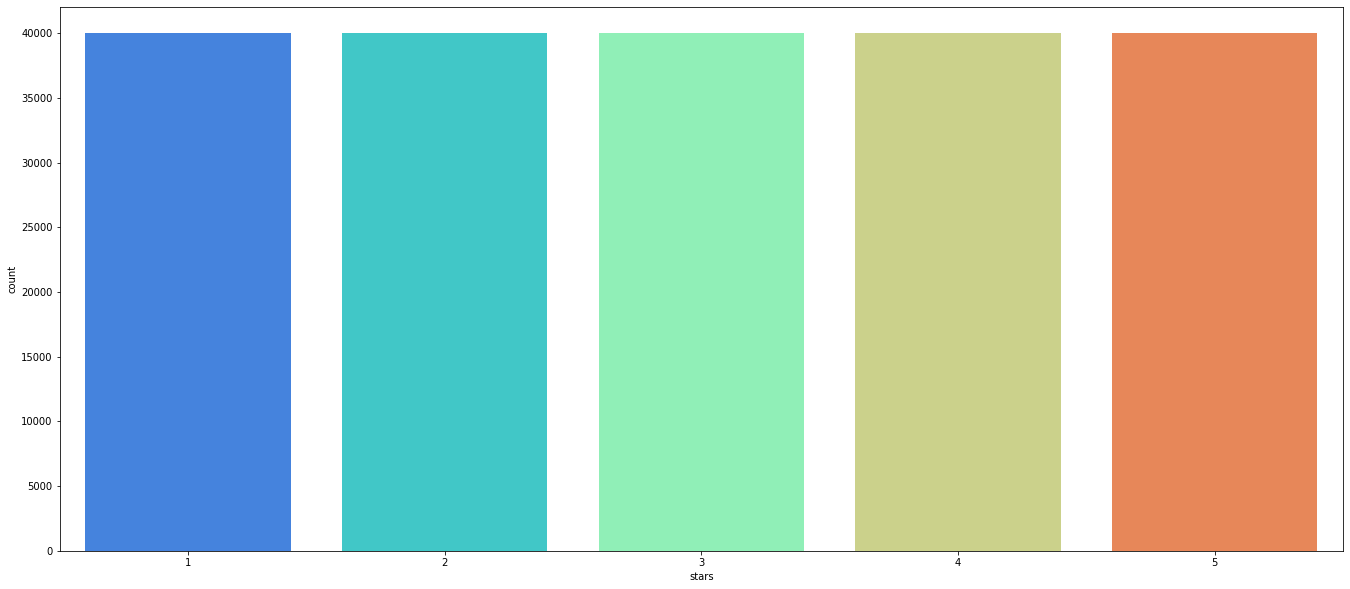

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'stars', data = df_train, palette = 'rainbow')
plt.show()

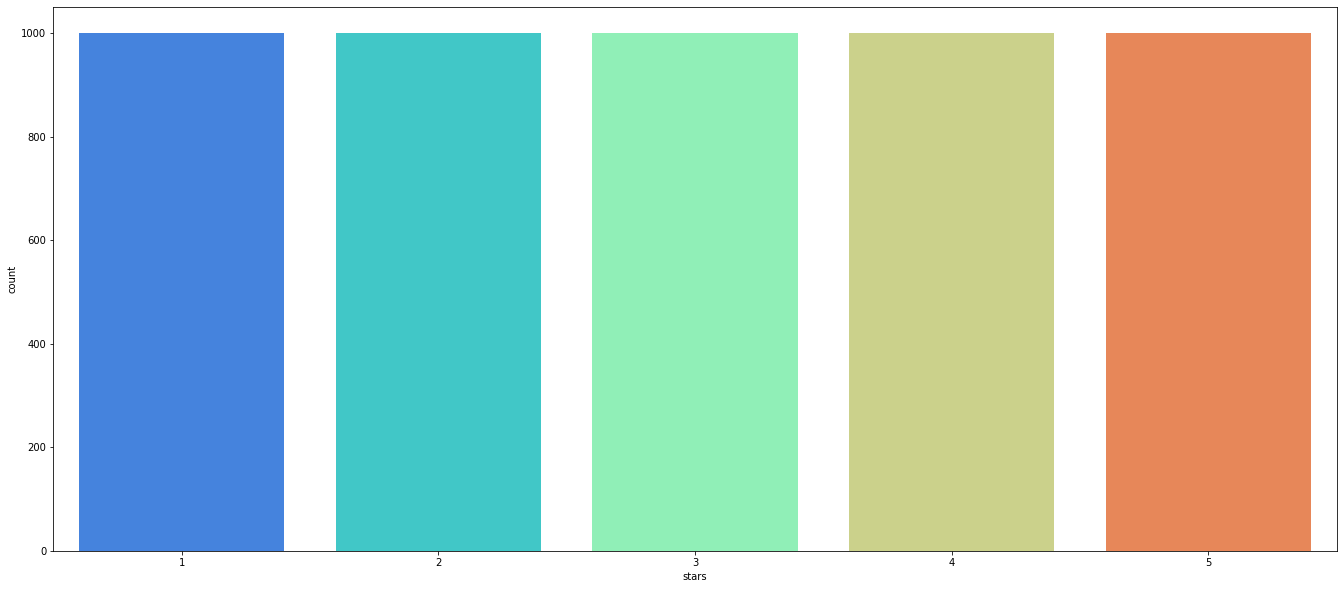

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'stars', data = df_test, palette = 'rainbow')
plt.show()

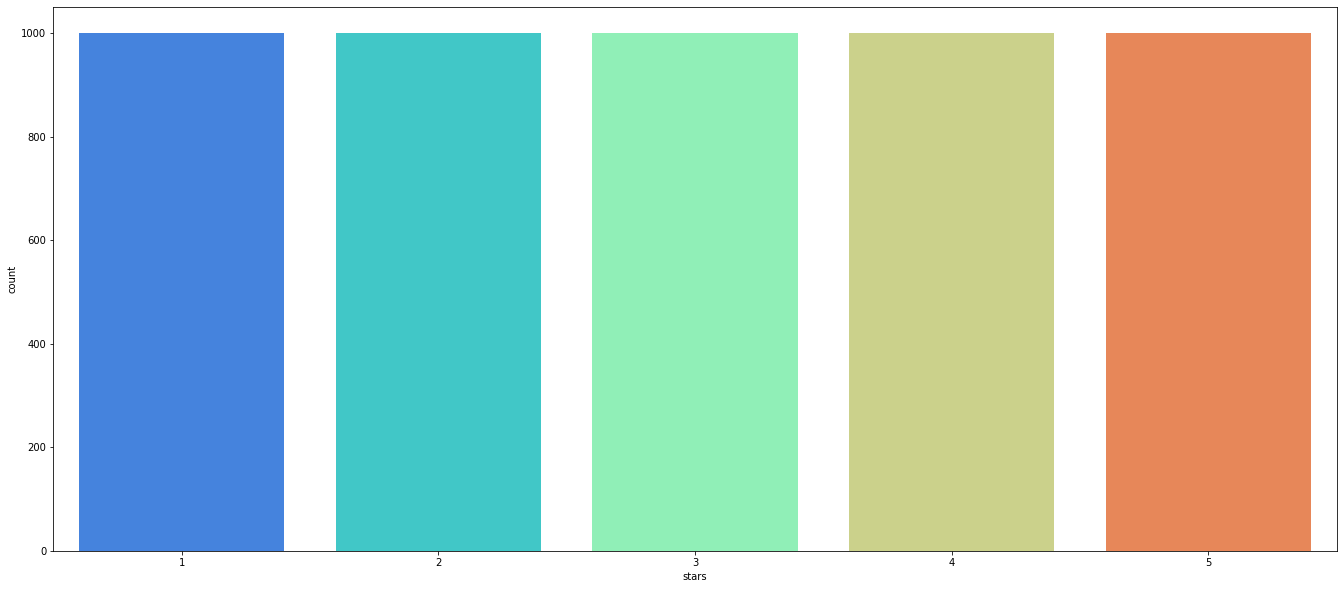

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'stars', data = df_dev, palette = 'rainbow')
plt.show()

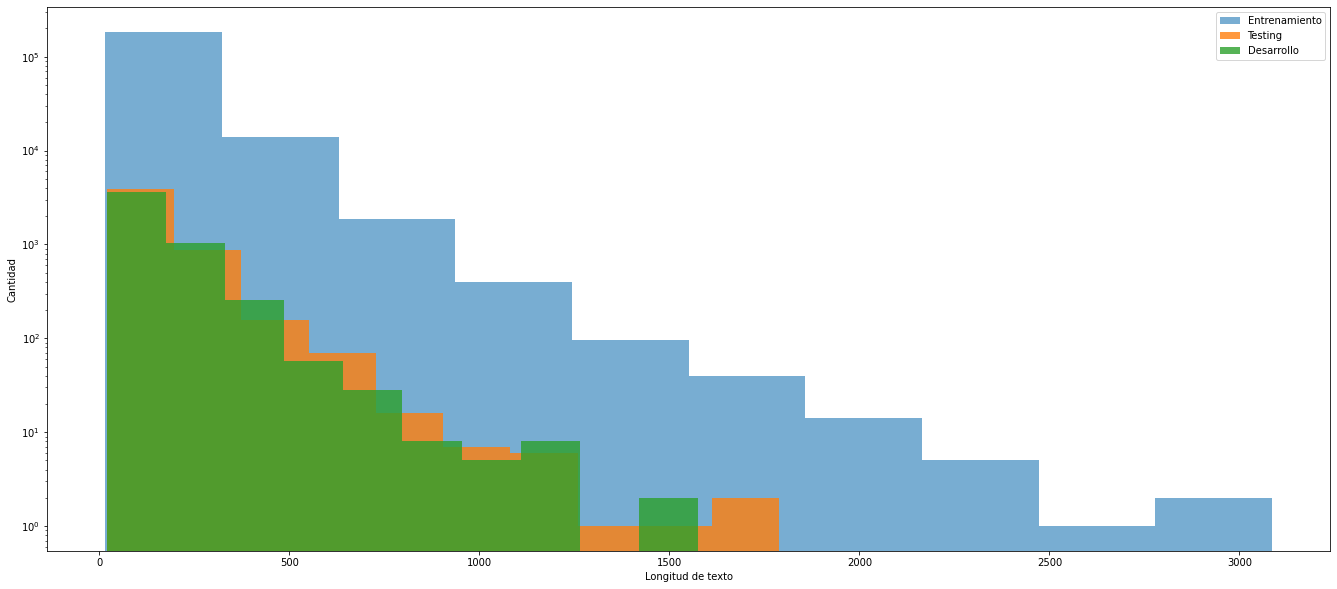

In [ ]:
f = plt.figure(figsize=(23,10))
columna = 'text_length'
plt.hist(df_train[columna], alpha = 0.6, label='Entrenamiento',log=True)
plt.hist(df_test[columna], alpha = 0.8, label='Testing',log=True)
plt.hist(df_dev[columna], alpha = 0.8, label='Desarrollo',log=True)
plt.xlabel('Longitud de texto')
plt.ylabel('Cantidad')
plt.legend(loc='upper right')

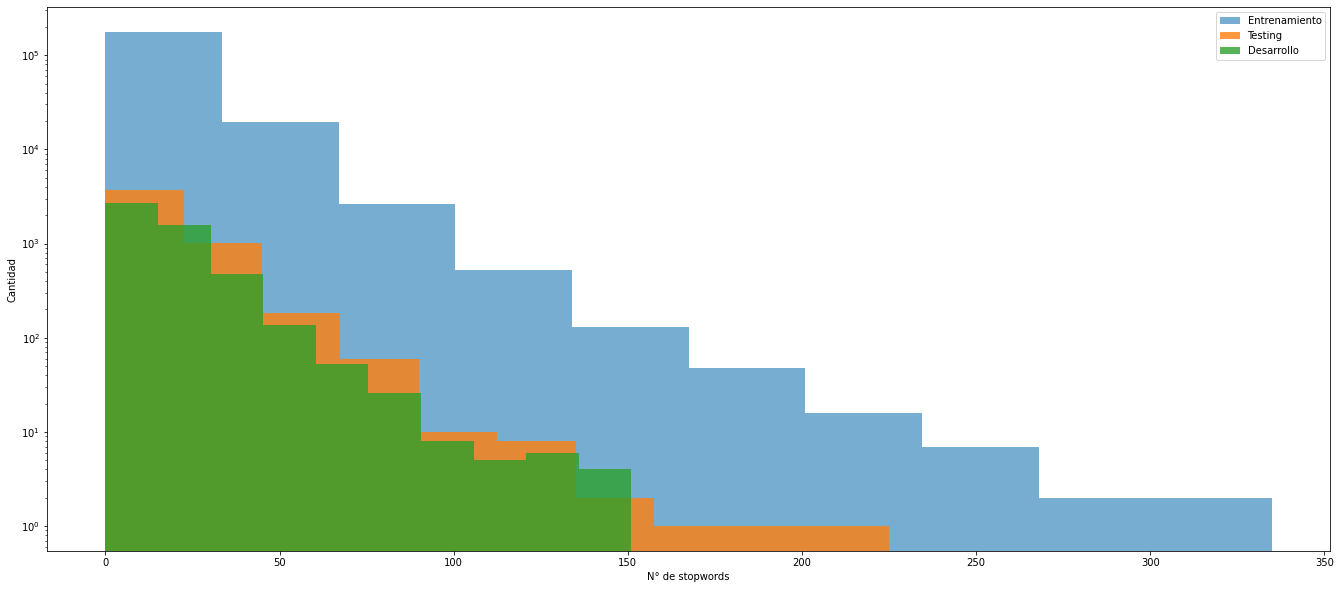

In [ ]:
f = plt.figure(figsize=(23,10))
columna = 'stop_word_count'
plt.hist(df_train[columna], alpha = 0.6, label='Entrenamiento',log=True)
plt.hist(df_test[columna], alpha = 0.8, label='Testing',log=True)
plt.hist(df_dev[columna], alpha = 0.8, label='Desarrollo',log=True)
plt.xlabel('N° de stopwords')
plt.ylabel('Cantidad')
plt.legend(loc='upper right')

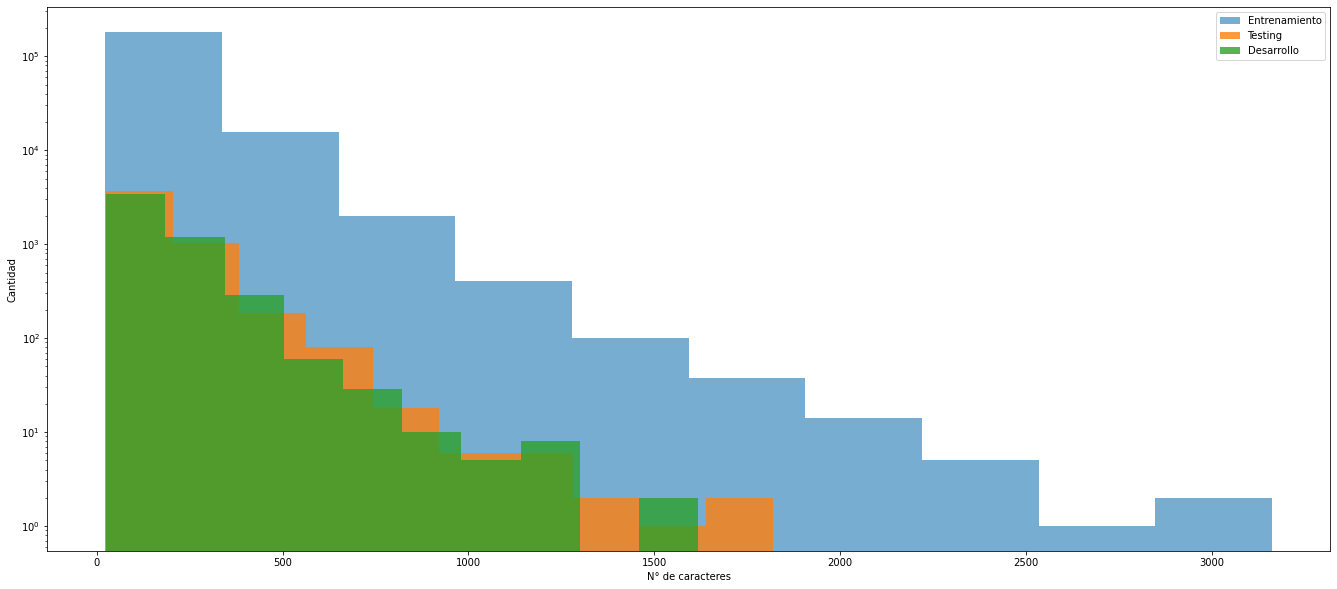

In [ ]:
f = plt.figure(figsize=(23,10))
columna = 'char_count'
plt.hist(df_train[columna], alpha = 0.6, label='Entrenamiento',log=True)
plt.hist(df_test[columna], alpha = 0.8, label='Testing',log=True)
plt.hist(df_dev[columna], alpha = 0.8, label='Desarrollo',log=True)
plt.xlabel('N° de caracteres')
plt.ylabel('Cantidad')
plt.legend(loc='upper right')

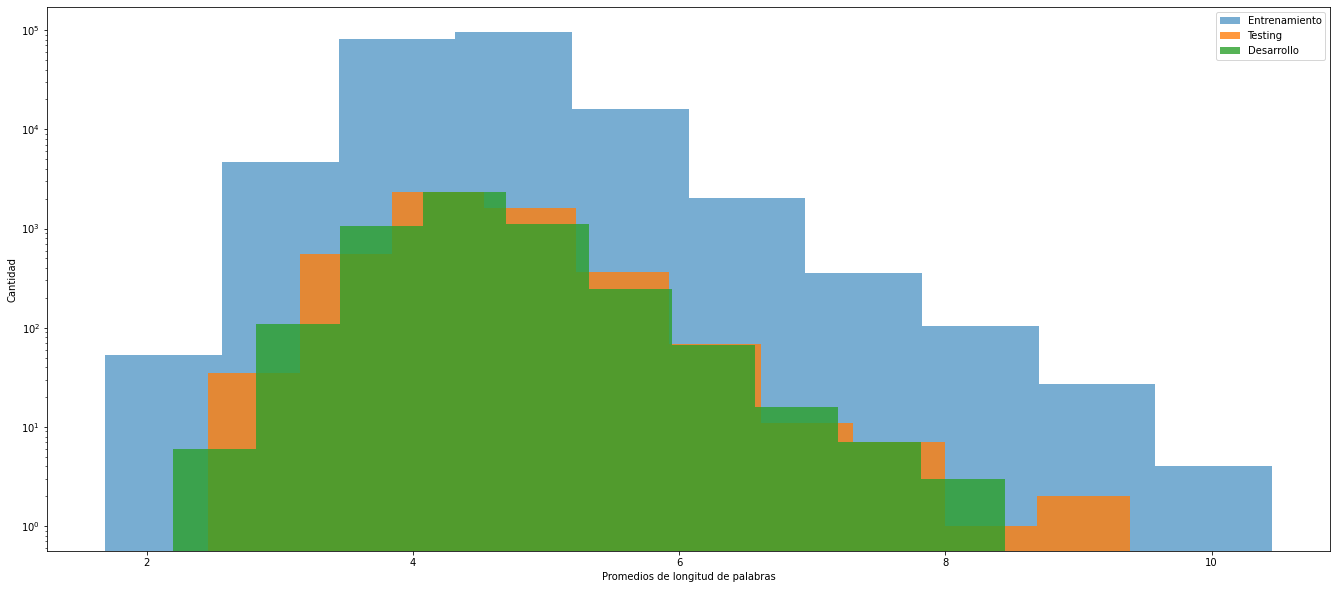

In [ ]:
f = plt.figure(figsize=(23,10))
columna = 'mean_word_length'
plt.hist(df_train[columna], alpha = 0.6, label='Entrenamiento',log=True)
plt.hist(df_test[columna], alpha = 0.8, label='Testing',log=True)
plt.hist(df_dev[columna], alpha = 0.8, label='Desarrollo',log=True)
plt.xlabel('Promedios de longitud de palabras')
plt.ylabel('Cantidad')
plt.legend(loc='upper right')

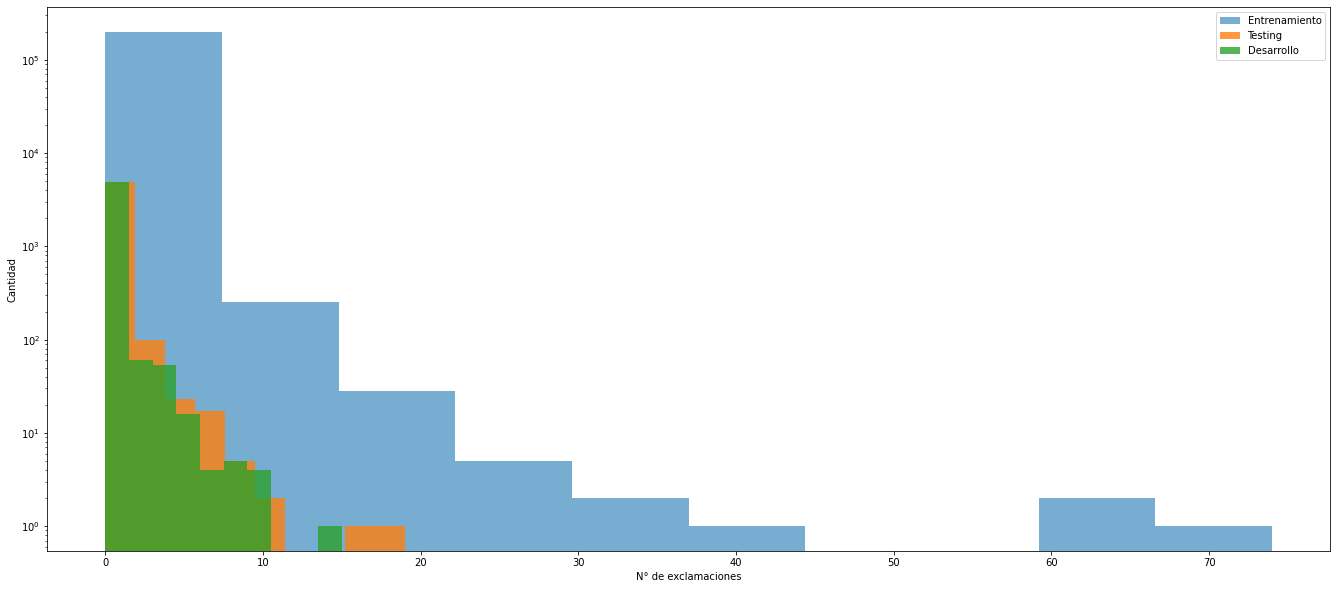

In [ ]:
f = plt.figure(figsize=(23,10))
columna = 'exclamation_count'
plt.hist(df_train[columna], alpha = 0.6, label='Entrenamiento',log=True)
plt.hist(df_test[columna], alpha = 0.8, label='Testing',log=True)
plt.hist(df_dev[columna], alpha = 0.8, label='Desarrollo',log=True)
plt.xlabel('N° de exclamaciones')
plt.ylabel('Cantidad')
plt.legend(loc='upper right')

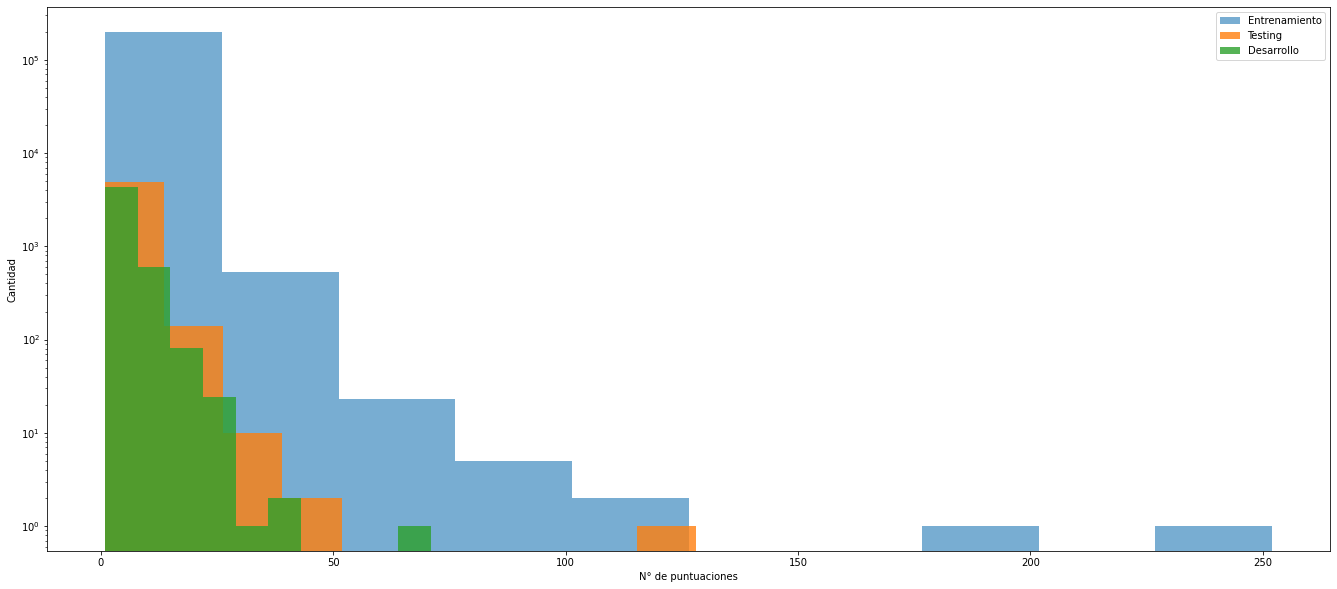

In [ ]:
f = plt.figure(figsize=(23,10))
columna = 'punctuation_count'
plt.hist(df_train[columna], alpha = 0.6, label='Entrenamiento',log=True)
plt.hist(df_test[columna], alpha = 0.8, label='Testing',log=True)
plt.hist(df_dev[columna], alpha = 0.8, label='Desarrollo',log=True)
plt.xlabel('N° de puntuaciones')
plt.ylabel('Cantidad')
plt.legend(loc='upper right')

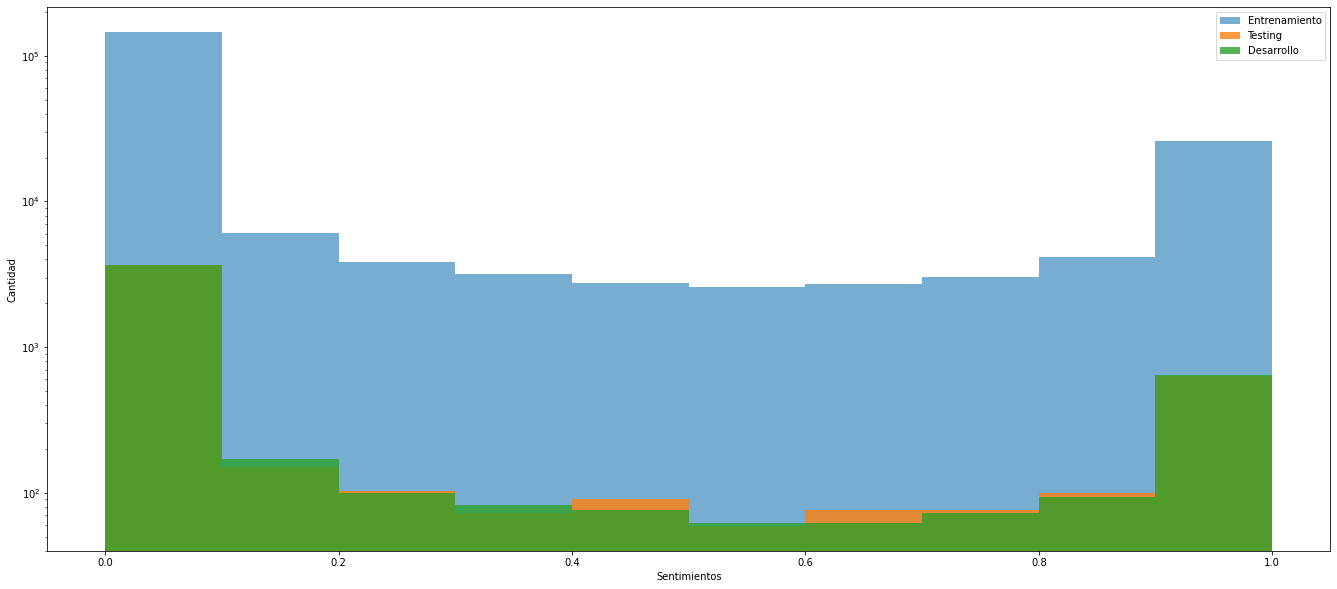

In [ ]:
f = plt.figure(figsize=(23,10))
columna = 'sentiment'
plt.hist(df_train[columna], alpha = 0.6, label='Entrenamiento',log=True)
plt.hist(df_test[columna], alpha = 0.8, label='Testing',log=True)
plt.hist(df_dev[columna], alpha = 0.8, label='Desarrollo',log=True)
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad')
plt.legend(loc='upper right')

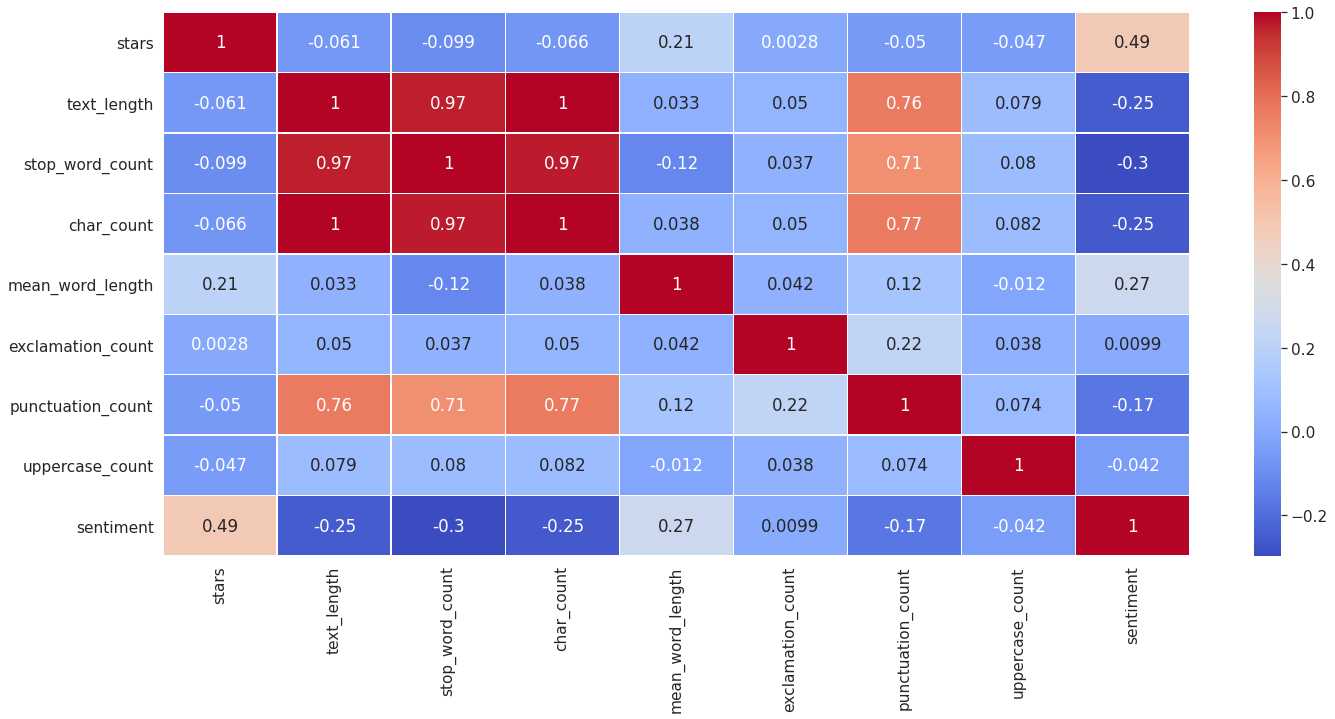

In [ ]:
sns.set(font_scale = 1.4)
plt.figure(figsize = (23,10))
sns.heatmap(df_train.corr(method='pearson'), cmap = 'coolwarm', annot = True, linewidths = .5)
plt.show()

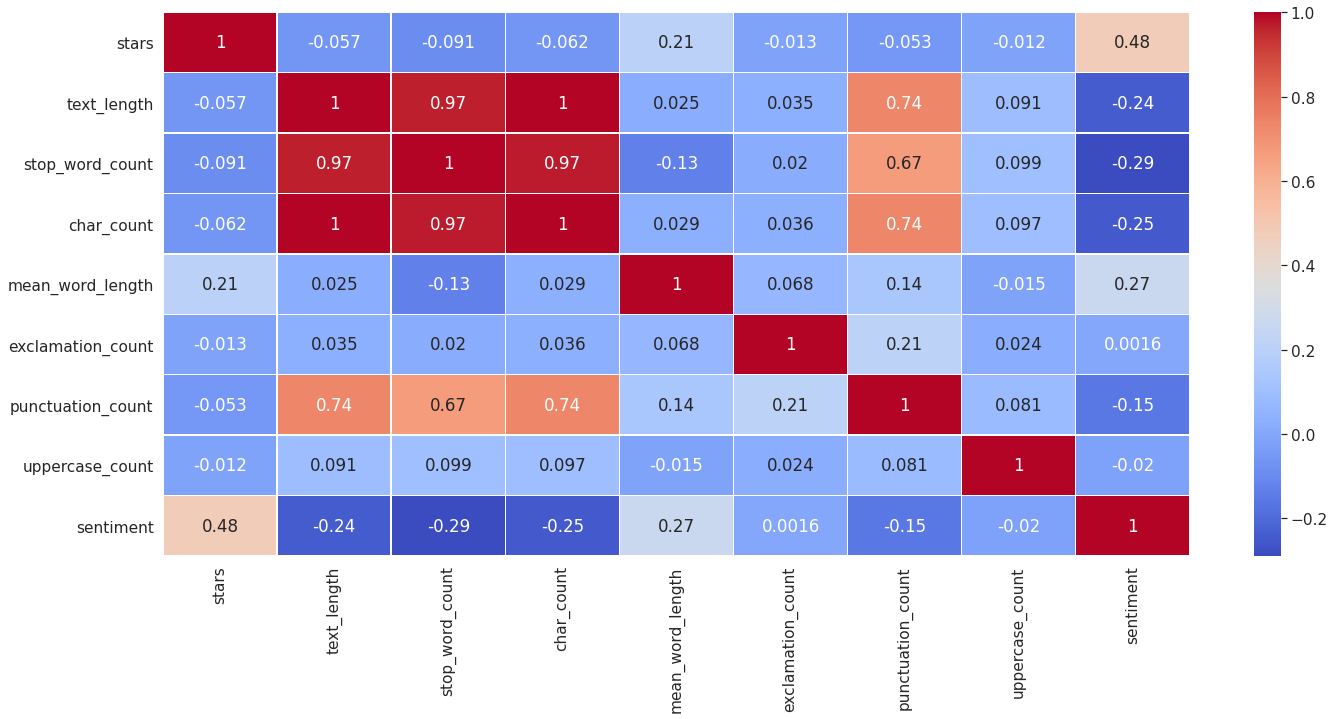

In [ ]:
sns.set(font_scale = 1.4)
plt.figure(figsize = (23,10))
sns.heatmap(df_test.corr(method='pearson'), cmap = 'coolwarm', annot = True, linewidths = .5)
plt.show()

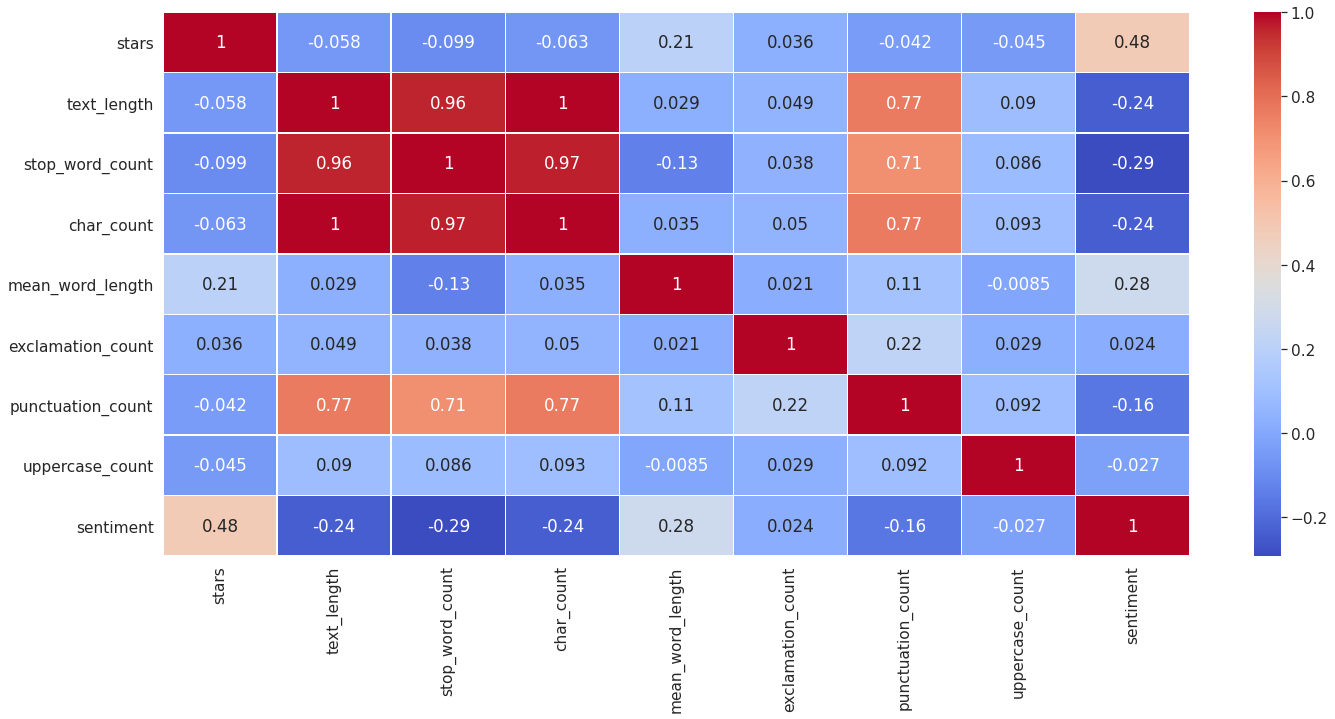

In [ ]:
sns.set(font_scale = 1.4)
plt.figure(figsize = (23,10))
sns.heatmap(df_dev.corr(method='pearson'), cmap = 'coolwarm', annot = True, linewidths = .5)
plt.show()

**¿Cuál es el promedio de estrellas de las diferentes categorías?**

In [ ]:
df_train.groupby('product_category')['stars'].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
apparel,5737.0,2.866829,1.387221,1.0,2.0,3.0,4.0,5.0
automotive,7143.0,2.950721,1.406303,1.0,2.0,3.0,4.0,5.0
baby_product,4881.0,3.089326,1.385600,1.0,2.0,3.0,4.0,5.0
beauty,7337.0,2.935805,1.414347,1.0,2.0,3.0,4.0,5.0
book,5264.0,3.399316,1.393413,1.0,2.0,4.0,5.0,5.0
camera,3029.0,3.109277,1.398578,1.0,2.0,3.0,4.0,5.0
digital_ebook_purchase,1843.0,3.357027,1.282784,1.0,2.0,3.0,4.0,5.0
drugstore,5513.0,3.010521,1.430628,1.0,2.0,3.0,4.0,5.0
electronics,10385.0,2.887626,1.434022,1.0,2.0,3.0,4.0,5.0


**Promedio de estrellas por categoria**

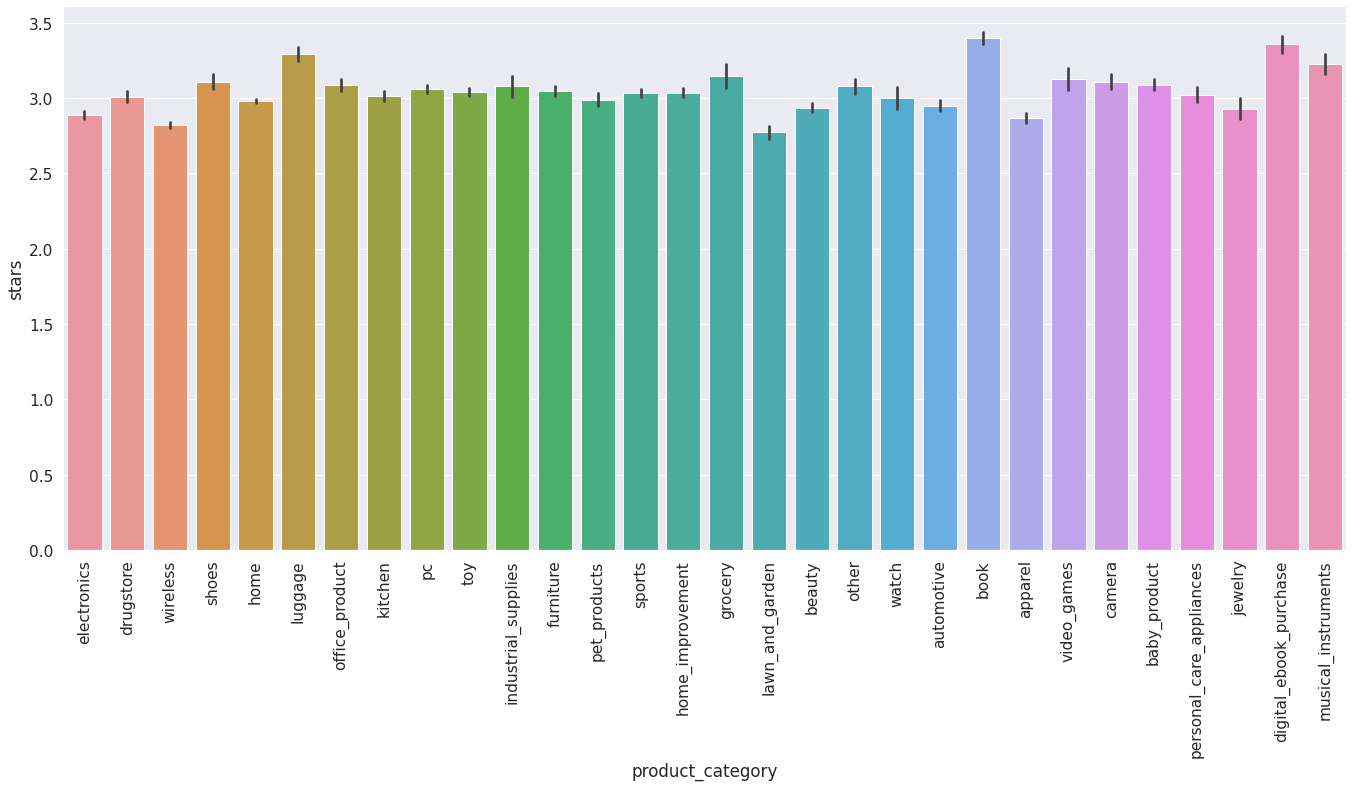

In [ ]:
plt.figure(figsize=(23,10))
plt.xticks(rotation = 90)
sns.barplot(data = df_train, x = 'product_category', y = 'stars')

La distribución de estrellas se encuentra bastante balanceada a través de las categorías.

**¿Cuál es el promedio de cantidad de texto según la categoría?**

In [ ]:
df_train.groupby('product_category')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
apparel,5737.0,124.834060,96.628267,17.0,61.00,109.0,153.0,1462.0
automotive,7143.0,137.067199,119.151216,20.0,60.00,110.0,169.0,1385.0
baby_product,4881.0,152.572014,121.168878,19.0,74.00,123.0,195.0,1954.0
beauty,7337.0,144.975467,123.298466,19.0,67.00,117.0,179.0,1981.0
book,5264.0,137.806801,116.898618,19.0,59.00,114.0,172.0,1714.0
camera,3029.0,180.597227,154.522068,20.0,82.00,137.0,224.0,1587.0
digital_ebook_purchase,1843.0,164.441671,122.192908,19.0,93.00,137.0,203.0,1161.0
drugstore,5513.0,143.368583,121.427461,20.0,64.00,116.0,178.0,1971.0
electronics,10385.0,169.193548,153.586144,19.0,75.00,128.0,207.0,2356.0


**Promedios de la longitud de los textos agrupado por categorias**

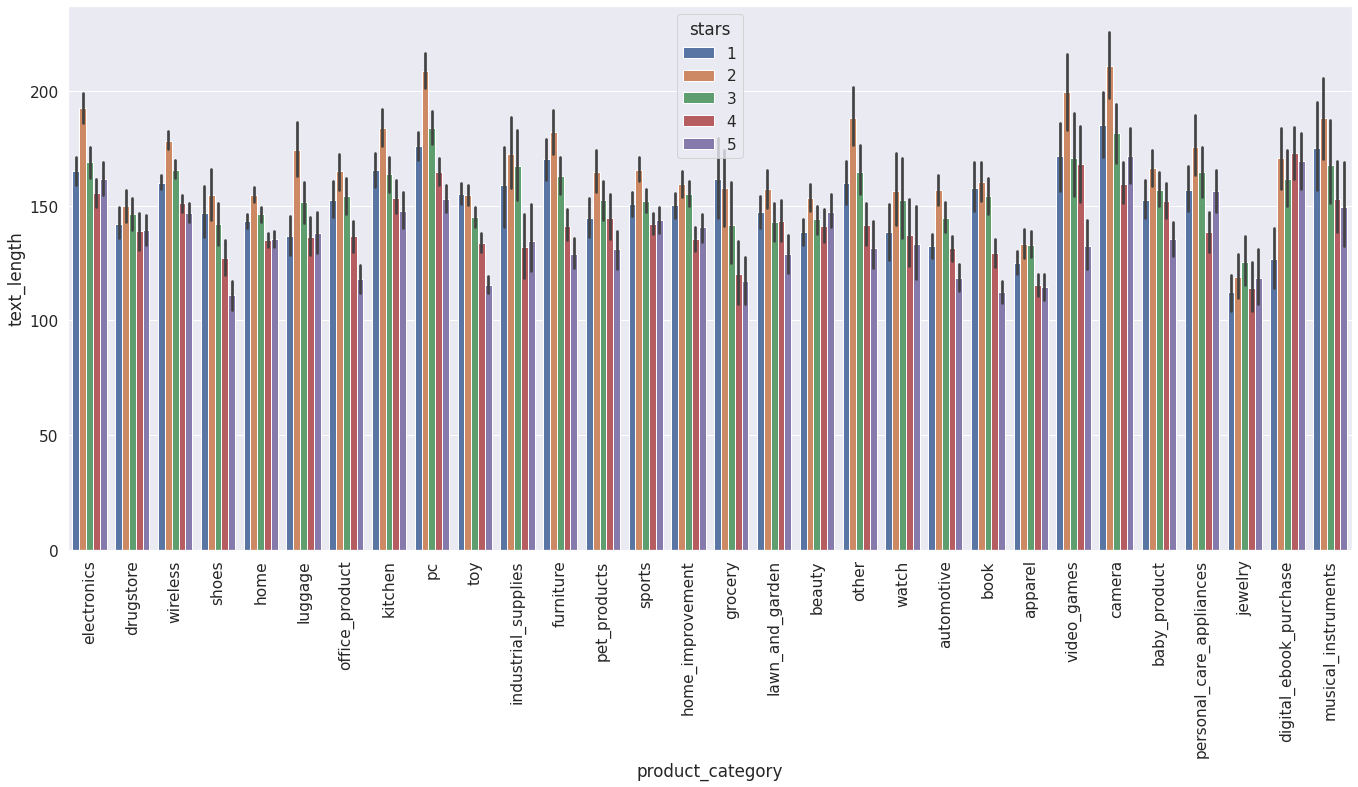

In [ ]:
plt.figure(figsize=(23,10))
plt.xticks(rotation = 90)
sns.barplot(data = df_train, x = 'product_category', y = 'text_length', hue = 'stars')

El promedio se mantiene constante entre las categorías, pero la desviación estandar es muy alta para todos, lo que significa que tenemos mucha variabilidad en la cantidad de texto. Por otra parte, el gráfico parece indicar que la gente escribe más cuando puntúa con 2 estrellas, repitiendose la misma tendencia en todas las categorías. Ocurre lo opuesto cuando la opinión sobre el producto es muy buena y se le asigna 5 estrellas.
Esto significa que hay un patron favorable para identificar las reviews de muy pocas estrellas con las reviews de muchas estrellas

**Histogramas de longitudes de texto**

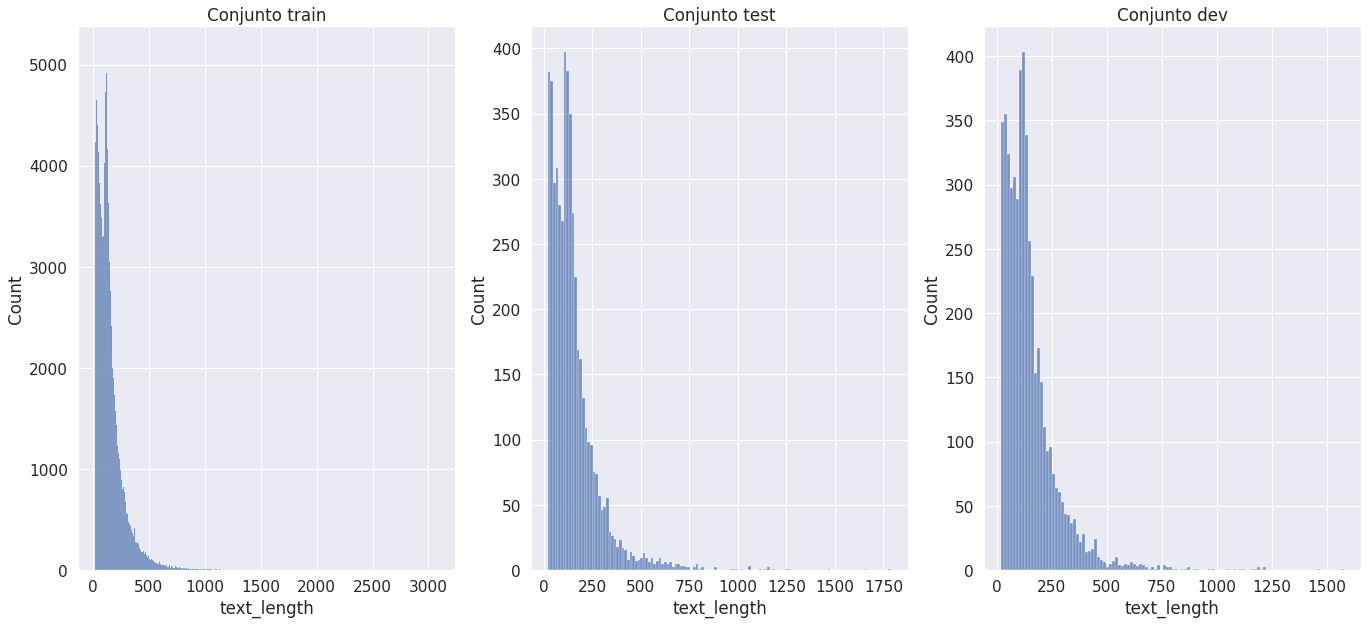

In [ ]:
f = plt.figure(figsize=(23,10))

ax = f.add_subplot(131)
ax.set_title("Conjunto train")
sns.histplot(df_train.text_length, ax=ax)
ax1 = f.add_subplot(132)
ax1.set_title("Conjunto test")
sns.histplot(df_test.text_length, ax=ax1)
ax2 = f.add_subplot(133)
ax2.set_title("Conjunto dev")
sns.histplot(df_dev.text_length, ax=ax2)

**¿Hay alguna relación entre el largo de texto y la cantidad de estrellas?**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.0, 1000.0)

<Figure size 1656x720 with 0 Axes>

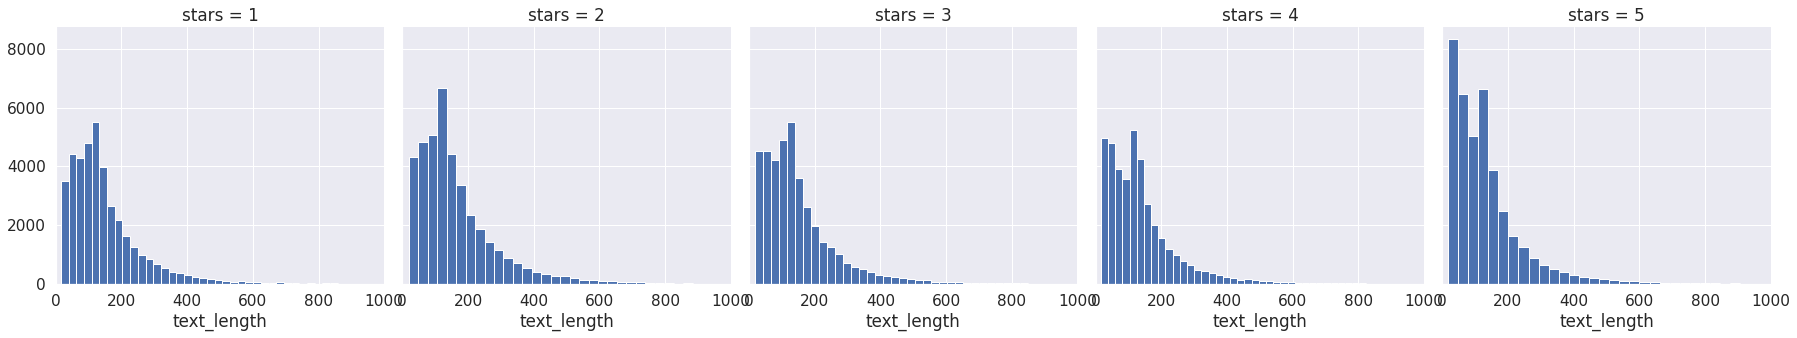

In [ ]:
plt.figure(figsize=(23,10))
g = sns.FacetGrid(df_train, col = 'stars', size=5)
g.map(plt.hist,'text_length', bins = 100)
plt.xlim(0,1000)

**Cantidad de reseñas por comprador**

Vamos a ver si hay algún dato útil o anomalía en la gente que compró mucho

In [ ]:
top_reviewers = df_train['reviewer_id'].value_counts().reset_index(name = 'frequency')
top_reviewers.rename(columns = {'index' : 'reviewer_id'}, inplace=True)
top_reviewers

,reviewer_id,frequency
0,reviewer_es_0588051,7
1,reviewer_es_0431022,7
2,reviewer_es_0437514,7
3,reviewer_es_0691152,6
4,reviewer_es_0424425,6
...,...,...
179071,reviewer_es_0715442,1
179072,reviewer_es_0459176,1
179073,reviewer_es_0461288,1
179074,reviewer_es_0653830,1


**Grafico de barras que muestra la cantidad de comentarios por frecuencia**

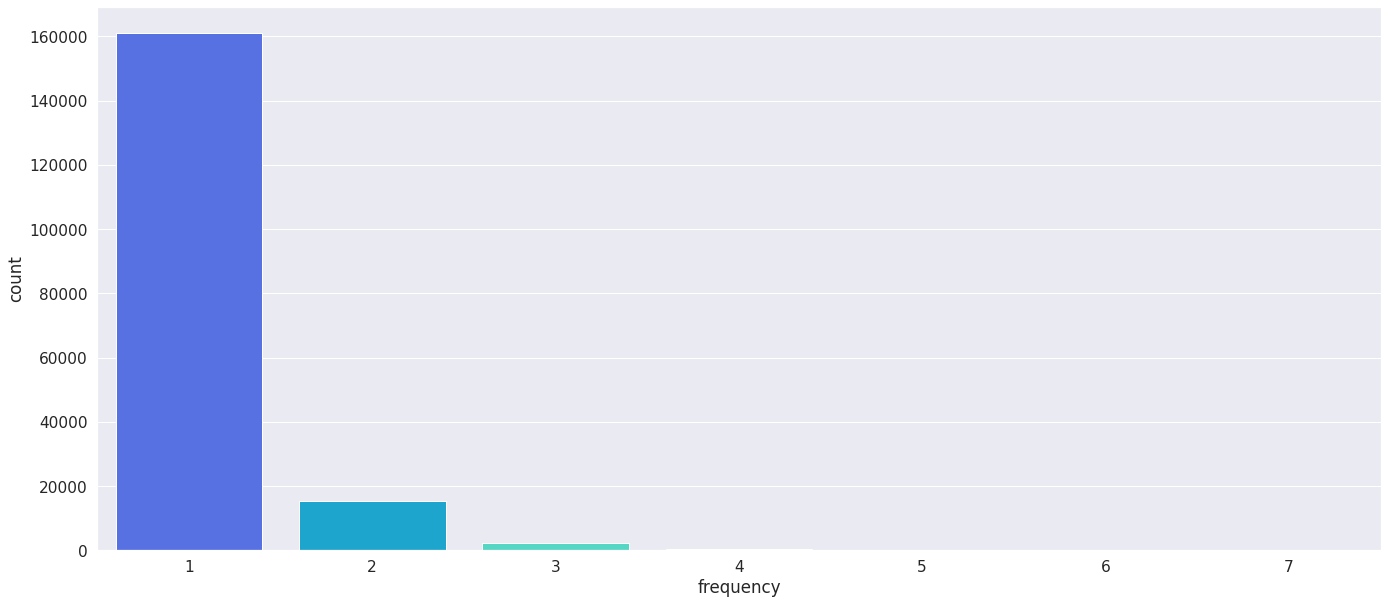

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'frequency', data = top_reviewers, palette = 'rainbow')

La mayoria de personas compran una sola vez

**Cantidad de reseñas por producto**

Veremos si hay productos que tuvieron más reseñas que otros

In [ ]:
top_products = df_train['product_id'].value_counts().reset_index(name = 'frequency')
top_products.rename(columns = {'index' : 'product_id'}, inplace=True)
top_products

,product_id,frequency
0,product_es_0261843,8
1,product_es_0568956,7
2,product_es_0874126,7
3,product_es_0086672,7
4,product_es_0523350,7
...,...,...
150933,product_es_0590701,1
150934,product_es_0273659,1
150935,product_es_0989651,1
150936,product_es_0787973,1


**Grafico de barras que muestra la cantidad de productos por frecuencia de reseña**

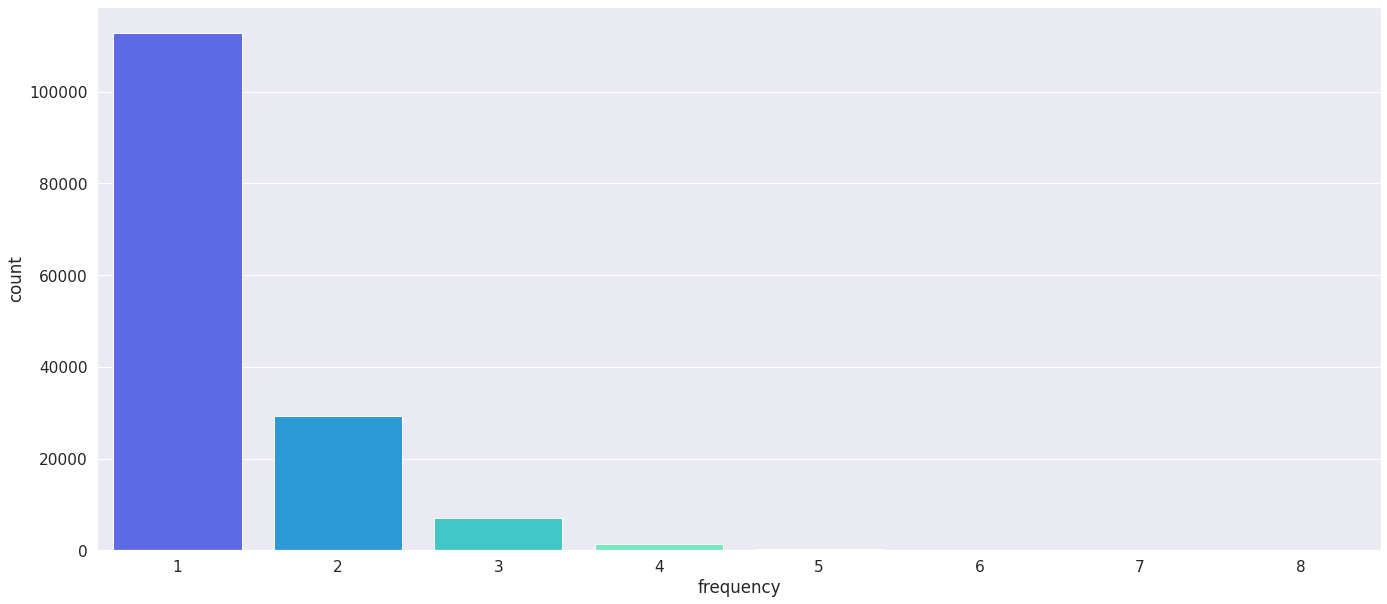

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'frequency', data = top_products, palette = 'rainbow')

# **3 Normalización de texto**

In [ ]:
cols_para_eliminar = ['review_id', 'product_id', 'reviewer_id', 'language', 'product_category', 'stop_word_count', 'char_count', 
                      'mean_word_length', 'exclamation_count', 'punctuation_count', 'uppercase_count', 'emojis', 'sentiment', 'full_text']
df_train.drop(labels=cols_para_eliminar, axis =1, inplace=True)
df_test.drop(labels=cols_para_eliminar, axis =1, inplace=True)
df_dev.drop(labels=cols_para_eliminar, axis =1, inplace=True)

print("Train:",df_train.shape)
print("Test:",df_test.shape)
print("Dev:",df_dev.shape)

Train: (200000, 4)
Test: (5000, 4)
Dev: (5000, 4)


Voy a concatenar los titulos y cuerpos de las reviews

In [ ]:
for d in [df_train, df_test, df_dev]:
  d['review_title_body']  = d['review_title']+' '+d['review_body']

Al principio parece que los emojis podrian ayudar en la clasificacion pero hay textos donde hay emojis de carita feliz y carita enojada, por lo que llevaria a una confusion. Por lo tanto voy a enfocarme en utilizar las palabras

In [ ]:
for d in [df_train, df_test, df_dev]:
  d['review_title_body'] = d['review_title_body'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

Voy a poner todas las palabras en minusculas para que al momento de vectorizar las palabras no haya problemas de redundancia

In [ ]:
for d in [df_train, df_test, df_dev]:
  d['review_title_body'] = d['review_title_body'].str.lower()

Voy a eliminar los caracteres irrelevantes en los textos y mantener los mas relevantes, para eso, uso una expresion regular que contiene las letras del alfabeto español

In [ ]:
for d in [df_train, df_test, df_dev]:
  d['review_title_body'].replace('[^A-Za-záéíóúÁÉÍÓÚÑñü]',' ', regex=True, inplace=True)

Asi es como queda:

In [ ]:
display(df_train)

,stars,review_body,review_title,text_length,review_title_body
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,94,television nevir nada bueno se me fue ka panta...
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,140,dinero tirado a la basura con esta compra horr...
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,117,solo llega una unidad cuando te obligan a comp...
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,332,producto no recibido no entro en descalificar...
4,1,Llega tarde y co la talla equivocada,Devuelto,36,devuelto llega tarde y co la talla equivocada
...,...,...,...,...,...
199995,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,142,tal y como se describe mando funciona perfecta...
199996,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,175,funciona perfectamente compré la batería con c...
199997,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,40,buena calidad buena calidad satisfecha con l...
199998,5,Perfecto para el cumple de mi hijo,Recomendado,34,recomendado perfecto para el cumple de mi hijo


In [ ]:
#Función patra llevar a minúsculas, eliminar stopwords, puntuaciones y lemmatizar

#nlp = spacy.load('es_core_news_lg')

def normalizar(texto, en_minuscula, remover_stowords):
    
    puntuaciones = string.punctuation
    stops = spacy.lang.es.stop_words.STOP_WORDS
    non_stops = ['bueno','buena'] #Palabras que ayudarian bastante
    otros = ['y', 'e', 'a', 'o', 'para', 'pare', 'paro', 'como', 'q','..','...','....', '.....','.......', '...........','¡','¿']

    if en_minuscula:
        texto = texto.lower()
    texto = nlp(texto)
    listalemm = list()
    for palabra in texto:
        if palabra.text not in non_stops:
            if not remover_stowords or (remover_stowords and palabra.text not in stops): 
                if palabra.text not in puntuaciones:
                    if palabra.text not in otros:
                        lemma = palabra.lemma_.strip()
                        listalemm.append(lemma)
        elif palabra.text in non_stops:
            lemma = palabra.lemma_.strip()
            listalemm.append(lemma)
            
    return " ".join(listalemm)

Voy a aplicar la funcion anterior a todos los datasets, pero en la entrega del proyecto voy a cargar los resultados por url porque colab necesita instalar una dependencia de spacy y reiniciar el entorno, el notebook debe ejecutarse sin errores.

En caso de que las urls no funcionen para cargar los datasets, por favor reemplazarlos por los archivos de este repositorio
https://github.com/MaximilianoAlarcon/Acamica_Proyecto_3_Amazon

In [ ]:
#df_train['review_title_body_lemm'] = df_train['review_title_body'].apply(normalizar, en_minuscula=True, remover_stowords=True)
df_train = pd.read_json("https://softpetsas.com/amazon_train_lemm.json")
df_train[["review_title_body","review_title_body_lemm"]].head()

,review_title_body,review_title_body_lemm
0,television nevir nada bueno se me fue ka panta...,television nevir bueno ka pantalla mes recibi...
1,dinero tirado a la basura con esta compra horr...,dinero tirado basura compra horrible tener co...
2,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...
3,producto no recibido no entro en descalificar...,producto recibir entrar descalificar vendedor...
4,devuelto llega tarde y co la talla equivocada,devuelto llegar co talla equivocado


In [ ]:
#df_test['review_title_body_lemm'] = df_test['review_title_body'].apply(normalizar, en_minuscula=True, remover_stowords=True)
df_test = pd.read_json("https://softpetsas.com/amazon_test_lemm.json")
df_test[["review_title_body","review_title_body_lemm"]].head()

,review_title_body,review_title_body_lemm
0,no me llego no me llego el articulo me lo mand...,llegar llegar articulo mandar correo normal se...
1,amazon sigue sin cumplir en las entregas la me...,amazon cumplir entrega mensajería horrible co...
2,estafa en el envío estoy muy decepcionado con ...,estafa envío decepcionado vendedor pedido cump...
3,estafa de amazon mi valoración no es sobre el ...,estafa amazon valoración producto amazon ofre...
4,no conseguí pasar de la portada en kindle pues...,conseguir pasar portada kindle interés libro p...


In [ ]:
#df_dev['review_title_body_lemm'] = df_dev['review_title_body'].apply(normalizar, en_minuscula=True, remover_stowords=True)
df_dev = pd.read_json("https://softpetsas.com/amazon_dev_lemm.json")
df_dev[["review_title_body","review_title_body_lemm"]].head()

,review_title_body,review_title_body_lemm
0,mala compra malisimo muy grande demasiado apa...,malo compra malisimo grande aparatoso protect...
1,no lo he recibido no he recibido el pedido no ...,recibir recibir pedido devolución
2,que no aprieta bien en el manillar tengo que b...,apretar manillar buscar sistema funcionar ab...
3,brocas de mantequilla utilicé las brocas de me...,broca mantequilla utilicé broca menor diámetro...
4,no me gusta no me gusta su olor a viejo y aspe...,gustar gustar olor viejo aspecto malo


Antes de continuar voy a hacer un pequeño analisis exploratorio al corpus 
normalizado

In [ ]:
def nube_palabras_por_clase(data, columna_texto, columna_categorica, clase):
  df_train_stars = data[data[columna_categorica] == clase]

  lista_palabras_stars = []

  for i in range(df_train_stars.shape[0]): 
      texto = df_train_stars.iloc[i][columna_texto]
      texto = nltk.tokenize.word_tokenize(texto)
      lista_palabras_stars.append(texto)

  lista_palabras_stars = list(itertools.chain(*lista_palabras_stars))

  plt.figure(figsize=(23,10))
  word_cloud = WordCloud(
                            background_color='black',
                            max_font_size = 80
                           ).generate(" ".join(lista_palabras_stars[:50]))
  plt.imshow(word_cloud)
  plt.axis('off')
  plt.show()

def palabras_mas_frecuentes_por_clase(data, columna_texto, columna_categorica, clase):
  df_train_stars = data[data[columna_categorica] == clase]
  lista_palabras_stars = []
  for i in range(df_train_stars.shape[0]): 
      texto = df_train_stars.iloc[i][columna_texto]
      texto = nltk.tokenize.word_tokenize(texto)
      lista_palabras_stars.append(texto)
  lista_palabras_stars = list(itertools.chain(*lista_palabras_stars))

  freq = nltk.probability.FreqDist(lista_palabras_stars)

  df = pd.DataFrame.from_dict(freq, orient='index')
  df.columns = ['Frequencia']
  df["Palabra"] = df.index.values
  df.index.name = 'Palabra'
  df.sort_values(by=['Frequencia'], ascending=False, inplace=True)
  df.reset_index(drop = True, inplace=True)

  plt.figure(figsize = (23,10))
  plot = sns.barplot(x  = df.iloc[:30].Palabra, y = df.iloc[:30].Frequencia)
  for item in plot.get_xticklabels():
      item.set_rotation(90)
  plt.show()

**Palabras mas frecuentes en la clase 1**

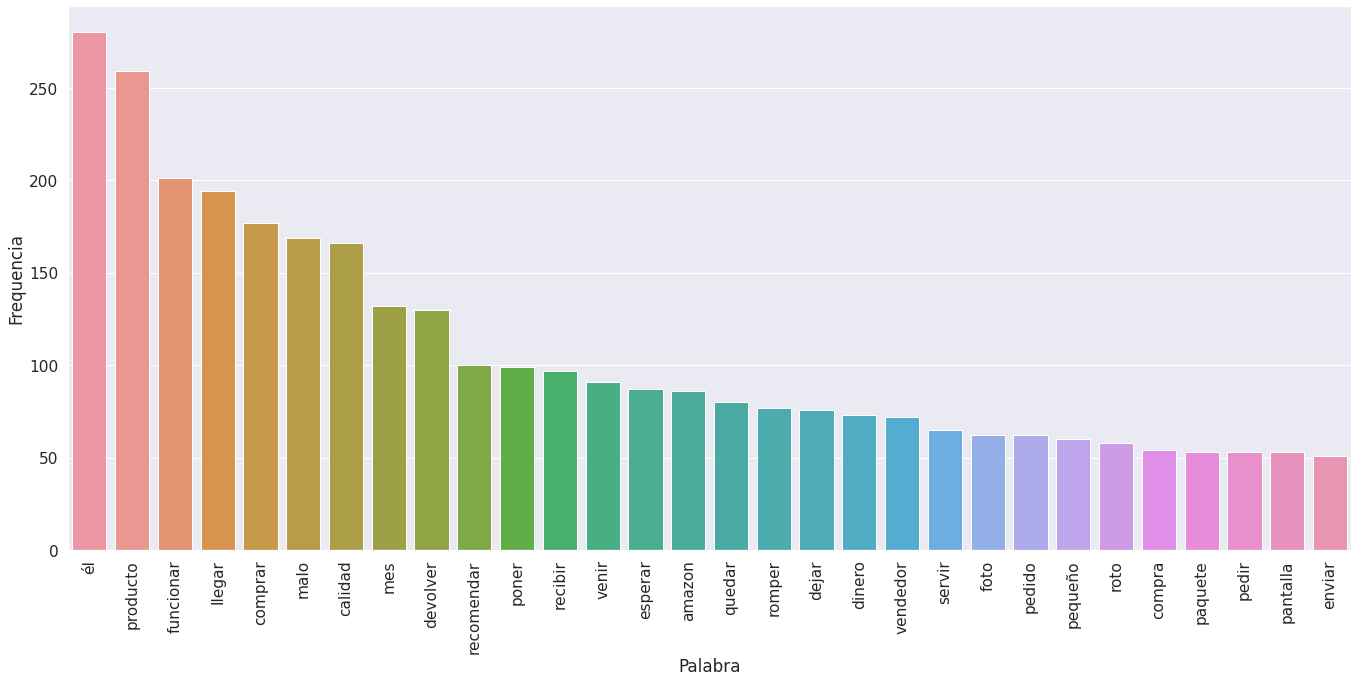

In [ ]:
palabras_mas_frecuentes_por_clase(df_test, "review_title_body_lemm", "stars", 1)

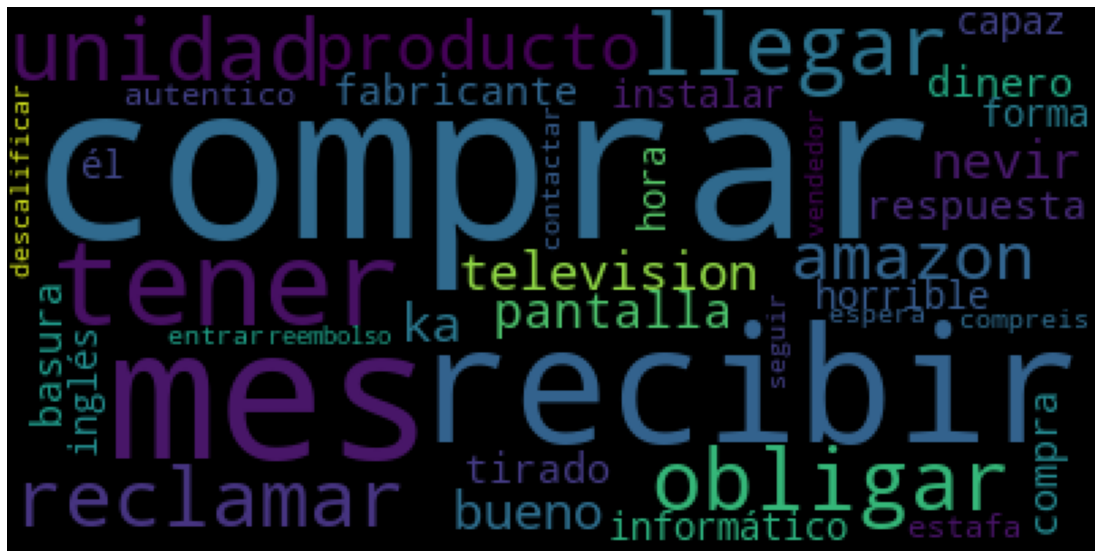

In [ ]:
nube_palabras_por_clase(df_train, "review_title_body_lemm", "stars", 1)

**Palabras mas frecuentes en la clase 2**

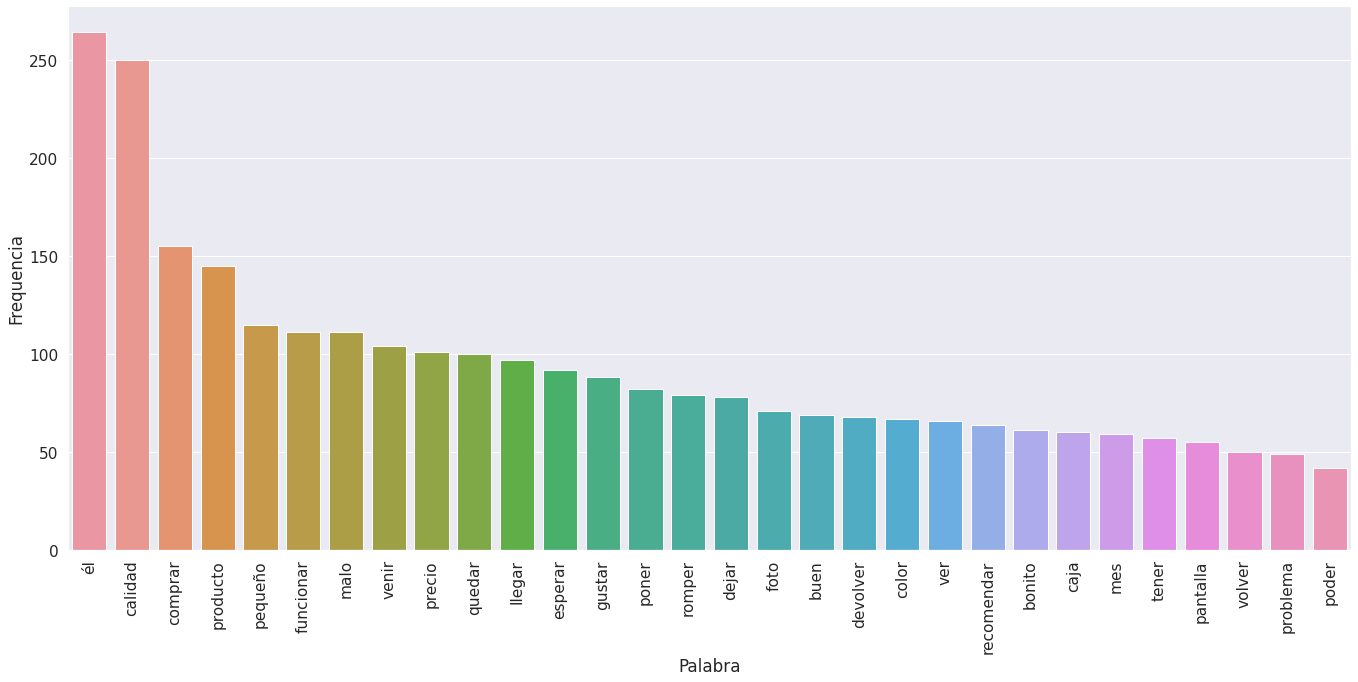

In [ ]:
palabras_mas_frecuentes_por_clase(df_test, "review_title_body_lemm", "stars", 2)

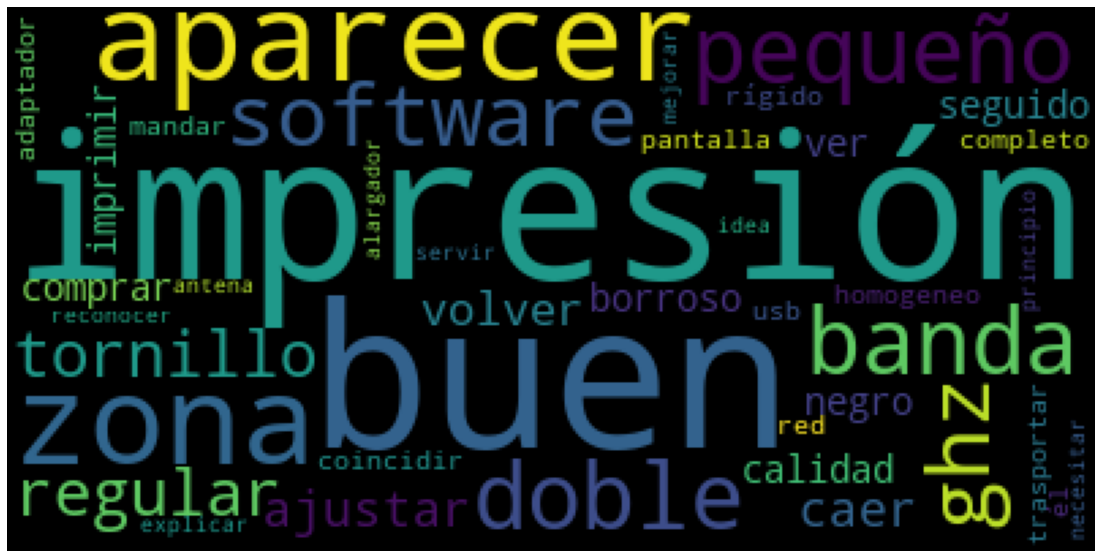

In [ ]:
nube_palabras_por_clase(df_train, "review_title_body_lemm", "stars", 2)

**Palabras mas frecuentes en la clase 3**

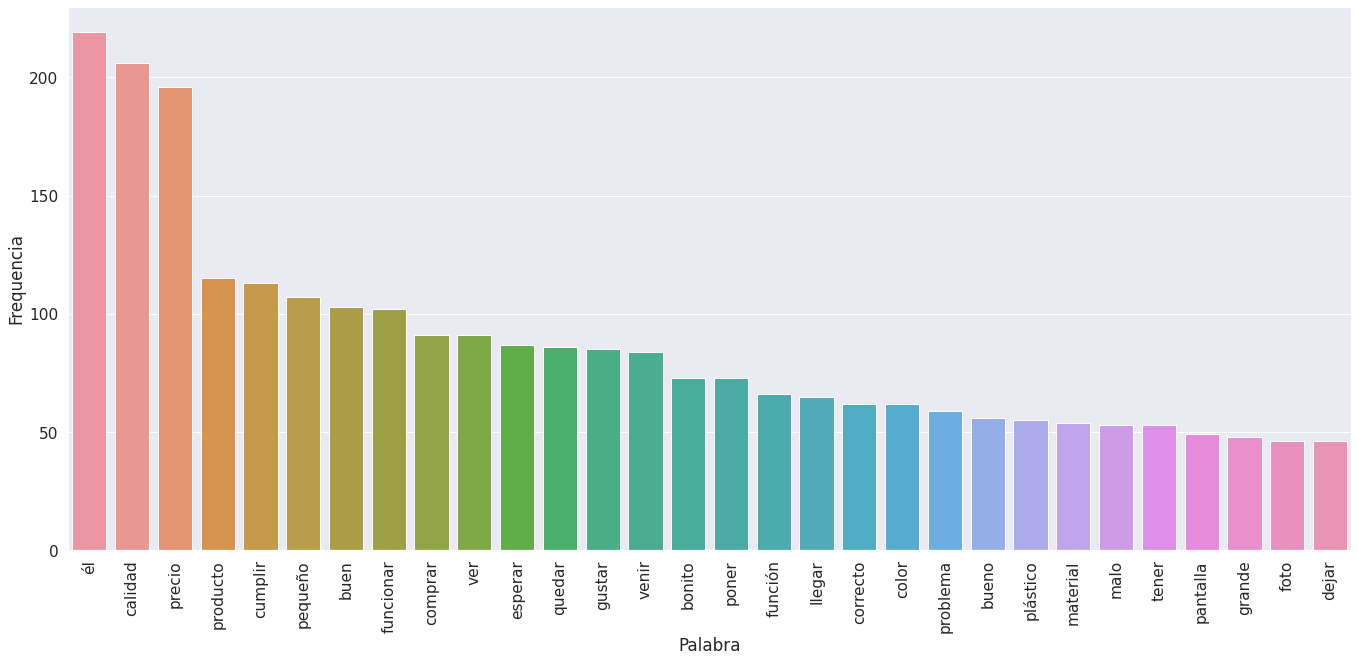

In [ ]:
palabras_mas_frecuentes_por_clase(df_test, "review_title_body_lemm", "stars", 3)

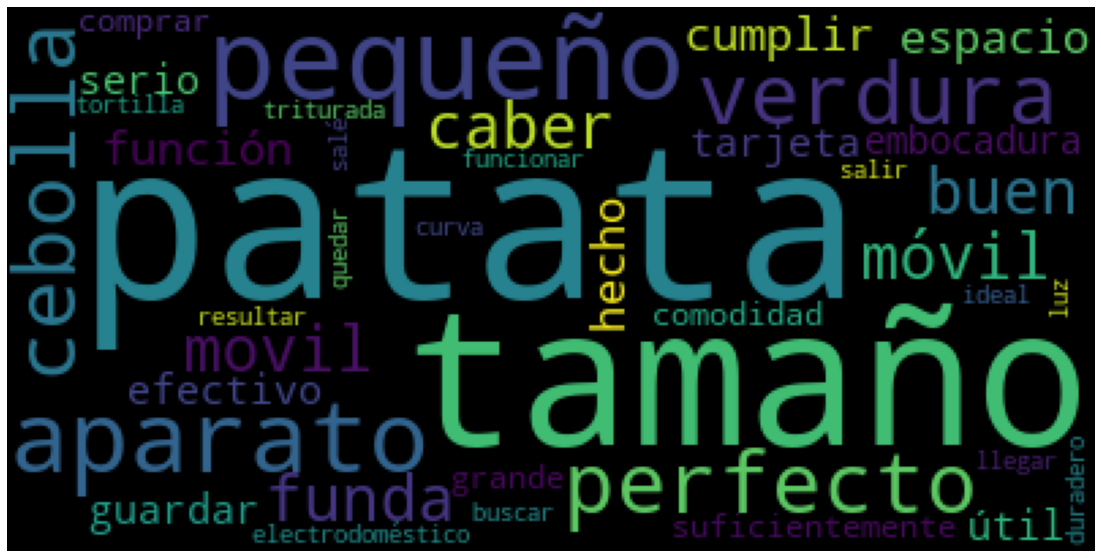

In [ ]:
nube_palabras_por_clase(df_train, "review_title_body_lemm", "stars", 3)

**Palabras mas frecuentes en la clase 4**

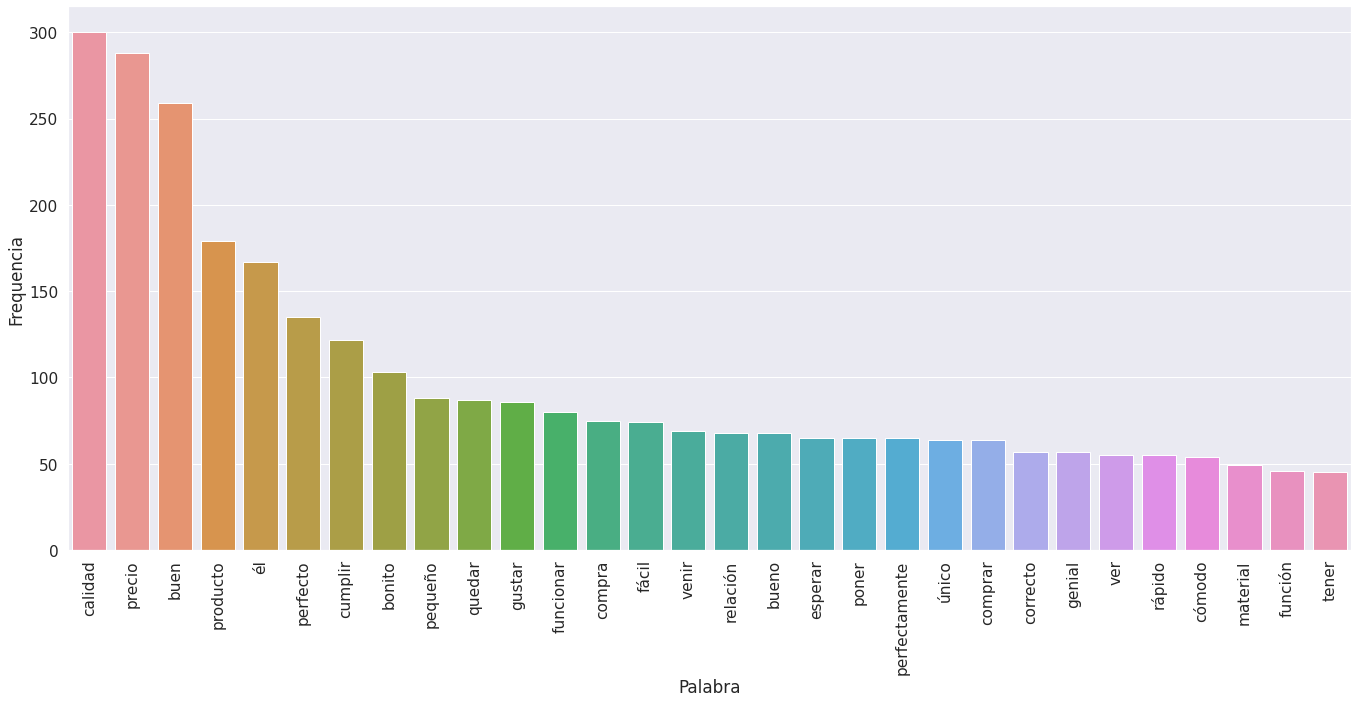

In [ ]:
palabras_mas_frecuentes_por_clase(df_test, "review_title_body_lemm", "stars", 4)

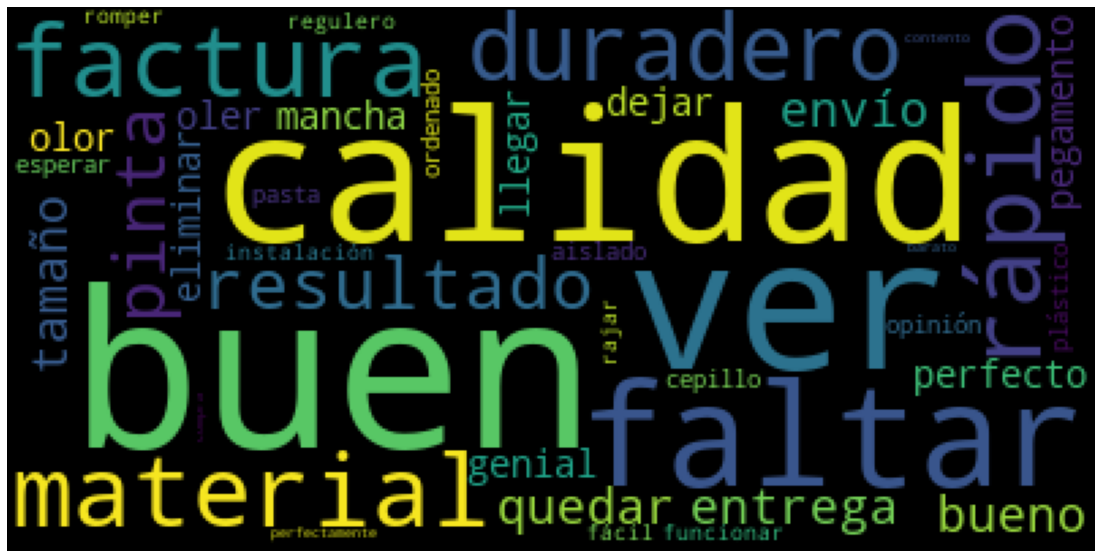

In [ ]:
nube_palabras_por_clase(df_train, "review_title_body_lemm", "stars", 4)

**Palabras mas frecuentes en la clase 5**

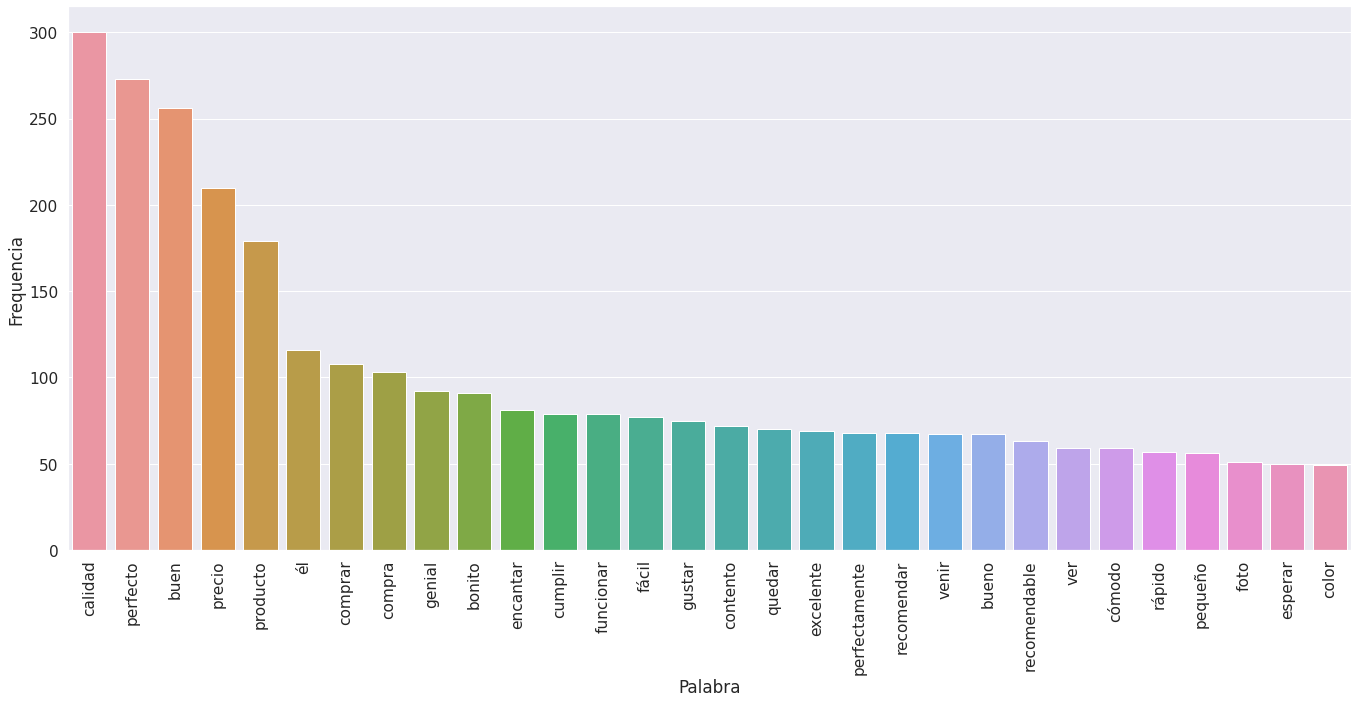

In [ ]:
palabras_mas_frecuentes_por_clase(df_test, "review_title_body_lemm", "stars", 5)

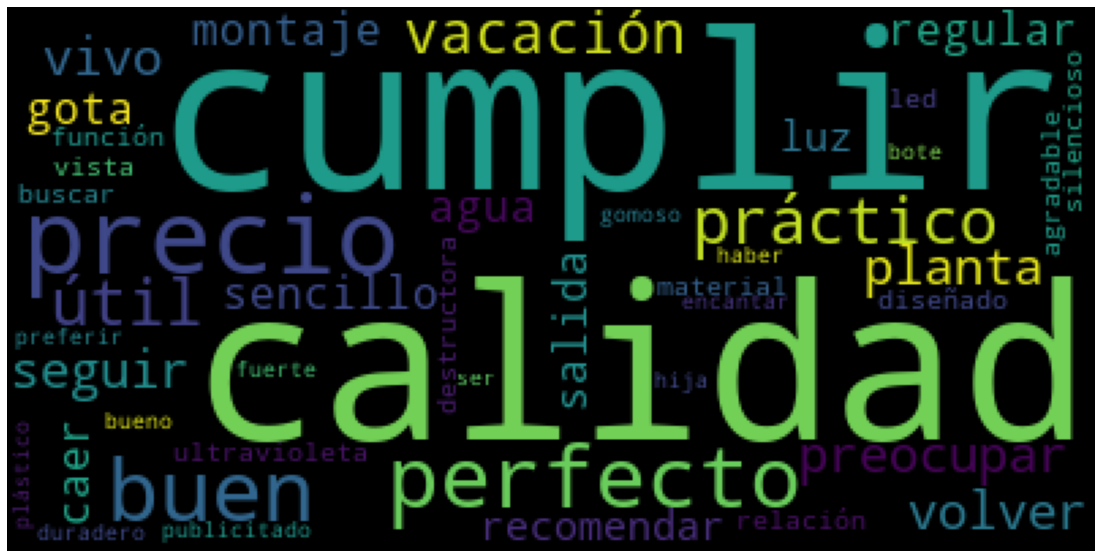

In [ ]:
nube_palabras_por_clase(df_train, "review_title_body_lemm", "stars", 5)

**Conclusion**:

1)
Las clases 1 y 5 tienen palabras representativas como: 

basura, reclamar, horrible, obligar, descalificar, tirado, estafa, reembolso

practico, sencillo, agradable, calidad, recomendar, encantar, perfecto

Esto servira para uno de los objetivos

2) La cantidad de registros por clase esta balanceada, esto servira para uno de los objetivos

# **4 Objetivos**

Objetivo 1: **Sistema de recomendacion**

Ademas de clasificar texto, se puede crear un sistema de recomendacion porque el dataset contiene los ids de usuarios, los ids de productos y el puntaje asignado que son la cantidad de estrellas, es mas, el dataset no contiene valores faltantes, por lo tanto deberia resultar en un modelo funcional. Por eso considero hacer esta tarea.

En principio tengo pensado utilizar el modelo SVD del paquete surprise porque esta especializado en crear sistemas de recomendacion
http://surpriselib.com/

**Nueva fuente de datos**

Voy a cargar fuentes de datos de la pagina "Amazon Review" https://nijianmo.github.io/amazon/index.html para mejorar el performance del sistema de recomendacion. En la seccion "Small subsets for experimentation" se encuentran los datasets con ids de items, ids de usuarios y ratings

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import gzip
import json

Volvere a cargar los datos de reviews

In [ ]:
columnas = ["product_id","reviewer_id","stars","product_category"]
df_train = pd.read_json("https://amazon-reviews-ml.s3-us-west-2.amazonaws.com/json/train/dataset_es_train.json", lines=True)
df_train = df_train[columnas]
df_test = pd.read_json("https://amazon-reviews-ml.s3-us-west-2.amazonaws.com/json/test/dataset_es_test.json", lines=True)
df_test = df_test[columnas]
df_dev = pd.read_json("https://amazon-reviews-ml.s3-us-west-2.amazonaws.com/json/dev/dataset_es_dev.json", lines=True)
df_dev = df_dev[columnas]

In [ ]:
df_train.loc[:,"product_id"] = df_train.loc[:,"product_id"].str.replace('product_es_','')
df_test.loc[:,"product_id"] = df_test.loc[:,"product_id"].str.replace('product_es_','')
df_dev.loc[:,"product_id"] = df_dev.loc[:,"product_id"].str.replace('product_es_','')

In [ ]:
df_train.loc[:,"reviewer_id"] = df_train.loc[:,"reviewer_id"].str.replace('reviewer_es_','')
df_test.loc[:,"reviewer_id"] = df_test.loc[:,"reviewer_id"].str.replace('reviewer_es_','')
df_dev.loc[:,"reviewer_id"] = df_dev.loc[:,"reviewer_id"].str.replace('reviewer_es_','')

Voy a quedarme con product_id, reviewer_id, stars y product_category

In [ ]:
df_amazon_reviews = pd.concat([df_train,df_test,df_dev])
df_amazon_reviews.head()

,product_id,reviewer_id,stars,product_category
0,0296024,0999081,1,electronics
1,0922286,0216771,1,electronics
2,0474543,0929213,1,drugstore
3,0656090,0224702,1,wireless
4,0662544,0224827,1,shoes


No hay datos faltantes

In [ ]:
df_amazon_reviews.isnull().sum()

product_id          0
reviewer_id         0
stars               0
product_category    0
dtype: int64

Hay un problema con el dataset de reviews, y es que la distribucion de categorias no es uniforme, si yo entreno un sistema de recomendacion con esos datos, solamente tendra potencial para recomendar los productos de la categoria mas frecuente.

Por eso voy a extraer datos de https://nijianmo.github.io/amazon/index.html pero solamente lo suficientes para acercar la distribucion de categorias a una distribucion uniforme

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


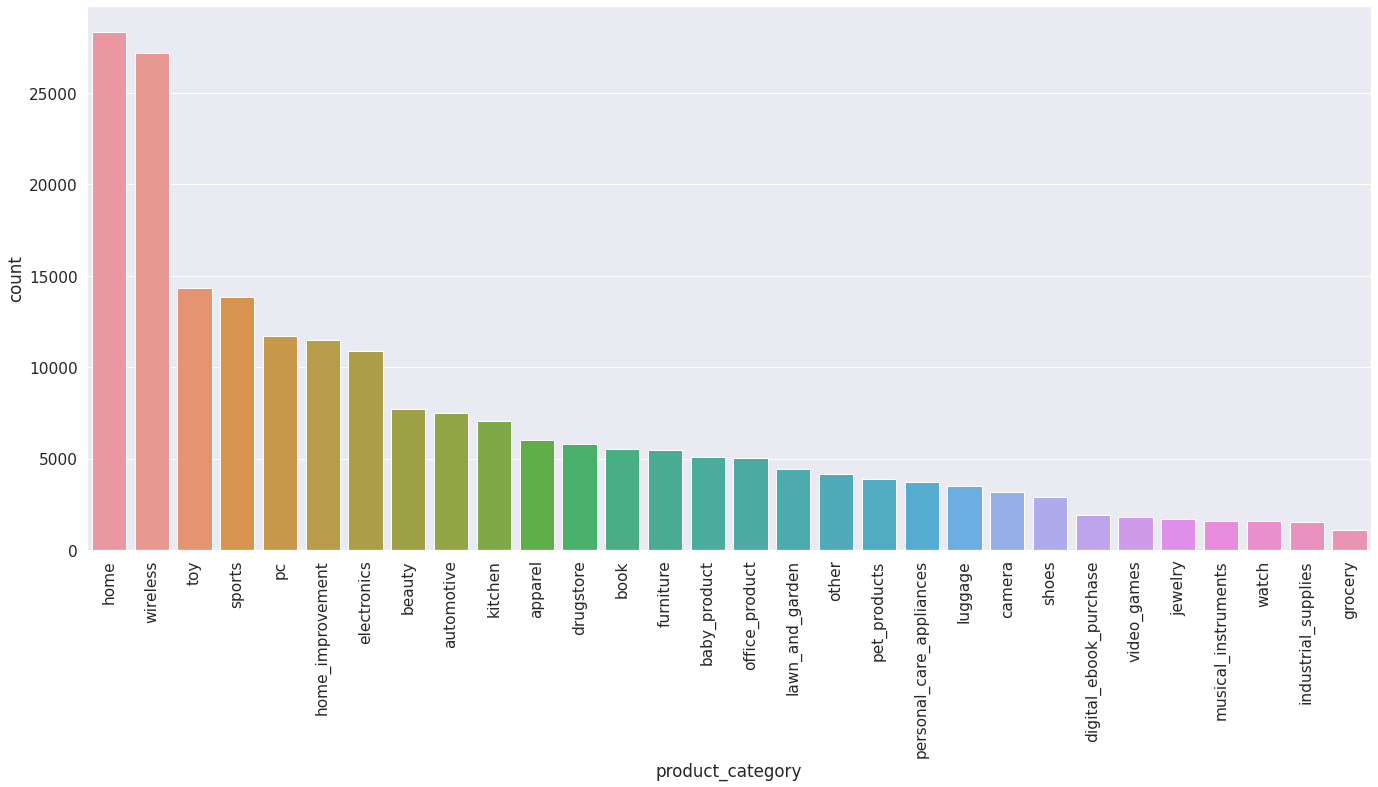

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(df_amazon_reviews["product_category"],order = df_amazon_reviews["product_category"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
counts = df_amazon_reviews["product_category"].value_counts()
cantidad_ideal = df_amazon_reviews["product_category"].value_counts()[0]
i = 0
for categoria in df_amazon_reviews["product_category"].value_counts().index:
  falta = cantidad_ideal - counts[i]
  print("A la categoria '"+categoria+"' le faltan "+str(falta)+" para llegar a "+str(cantidad_ideal))
  i+=1

A la categoria 'home' le faltan 0 para llegar a 28328
A la categoria 'wireless' le faltan 1120 para llegar a 28328
A la categoria 'toy' le faltan 14000 para llegar a 28328
A la categoria 'sports' le faltan 14472 para llegar a 28328
A la categoria 'pc' le faltan 16608 para llegar a 28328
A la categoria 'home_improvement' le faltan 16860 para llegar a 28328
A la categoria 'electronics' le faltan 17429 para llegar a 28328
A la categoria 'beauty' le faltan 20621 para llegar a 28328
A la categoria 'automotive' le faltan 20833 para llegar a 28328
A la categoria 'kitchen' le faltan 21300 para llegar a 28328
A la categoria 'apparel' le faltan 22314 para llegar a 28328
A la categoria 'drugstore' le faltan 22550 para llegar a 28328
A la categoria 'book' le faltan 22800 para llegar a 28328
A la categoria 'furniture' le faltan 22847 para llegar a 28328
A la categoria 'baby_product' le faltan 23230 para llegar a 28328
A la categoria 'office_product' le faltan 23318 para llegar a 28328
A la categori

In [ ]:
def filtro_dataset(dataset, columna_id_item, columna_id_usuario, columna_rating):

  dataset.sort_values(by=[columna_rating],ascending=False,inplace=True)
  dataset.drop_duplicates(subset=[columna_id_usuario,columna_id_item],inplace=True)
  dataset.reset_index(drop=True)

  usu = dataset[columna_id_item].groupby(dataset[columna_id_usuario]).agg(['count']).reset_index()
  dataset = pd.merge(dataset,usu,on=columna_id_usuario)
  ind = dataset[dataset['count'] <= 5].index
  dataset.drop(index=ind,inplace=True)
  dataset.drop(['count'],axis=1,inplace=True)
  dataset.reset_index(drop=True)

  usu = dataset[columna_id_usuario].groupby(dataset[columna_id_item]).agg(['count']).reset_index()
  dataset = pd.merge(dataset,usu,on=columna_id_item)
  ind = dataset[dataset['count'] <= 5 ].index
  dataset.drop(index=ind,inplace=True)
  dataset.drop(['count'],axis=1,inplace=True)
  dataset.reset_index(drop=True)

def concatenar_fuente_externa(url,dataframe,columna_categorica,cantidad_faltante):
  columnas_fuentes_externas = ["product_id","reviewer_id","stars","timestamp"]
  df_cache = pd.read_csv(url, names=columnas_fuentes_externas, header=None)
  filtro_dataset(df_cache, "product_id", "reviewer_id", "stars")
  cant_falta = cantidad_faltante
  cant_estratificada = int(cant_falta/5)
  cant_falta = cant_estratificada*5
  #df_cache = df_cache[:cant_falta]
  df_cache = df_cache[["product_id","reviewer_id","stars"]]

  df_1 = df_cache[df_cache["stars"] == 1][:cant_estratificada]
  df_2 = df_cache[df_cache["stars"] == 2][:cant_estratificada]
  df_3 = df_cache[df_cache["stars"] == 3][:cant_estratificada]
  df_4 = df_cache[df_cache["stars"] == 4][:cant_estratificada]
  df_5 = df_cache[df_cache["stars"] == 5][:cant_estratificada]

  df_cache = pd.concat([df_1,df_2,df_3,df_4,df_5])

  df_cache["product_category"] = [columna_categorica for i in range(cant_falta)]
  return df_cache

A la categoria 'grocery' le faltan 27221 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Grocery_and_Gourmet_Food.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"grocery",27221)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(237220, 4)


A la categoria 'industrial_supplies' le faltan 26776 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Industrial_and_Scientific.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"industrial_supplies",26776)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(263995, 4)


A la categoria 'musical_instruments' le faltan 26720 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Musical_Instruments.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"musical_instruments",26720)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(290715, 4)


A la categoria 'video_games' le faltan 26510 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Video_Games.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"video_games",26510)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(317225, 4)


A la categoria 'personal_care_appliances' le faltan 24593 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Appliances.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"personal_care_appliances",24593)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(341815, 4)


A la categoria 'pet_products' le faltan 24429 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Pet_Supplies.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"pet_products",24429)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(366240, 4)


A la categoria 'lawn_and_garden' le faltan 23879 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Patio_Lawn_and_Garden.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"lawn_and_garden",23879)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(390115, 4)


A la categoria 'office_product' le faltan 23318 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Office_Products.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"office_product",23318)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(413430, 4)


A la categoria 'book' le faltan 22800 para llegar a 28328

El dataset de books es MUY pesado, por eso voy a cargar el resultado por url

In [ ]:
#ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Books.csv"
#df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"book",22800)
df_cache = pd.read_csv("http://sadmoron.com/df_productos_books_externos.csv")
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(436230, 4)


A la categoria 'automotive' le faltan 20833 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Automotive.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"automotive",20833)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(457060, 4)


A la categoria 'beauty' le faltan 20621 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Luxury_Beauty.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"beauty",20621)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(477680, 4)


A la categoria 'electronics' le faltan 17429 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Electronics.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"electronics",17429)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(495105, 4)


A la categoria 'sports' le faltan 14472 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Sports_and_Outdoors.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"sports",14472)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(509575, 4)


A la categoria 'toy' le faltan 14000 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Toys_and_Games.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"toy",14000)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(523575, 4)


A la categoria 'home_improvement' le faltan 16860 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Tools_and_Home_Improvement.csv"
df_cache = concatenar_fuente_externa(ruta,df_amazon_reviews,"home_improvement",16860)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(540435, 4)


**Excepciones:**

Las fuentes externas de productos con categorias "Apparel","Shoes" y "Jewerly" se encuentran dentro de un mismo dataset:
http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Clothing_Shoes_and_Jewelry.csv

Necesito separar los productos dentro del dataset, para eso voy a crear 3 listas de ids de productos, una lista para cada categoria. Para eso utilizare el dataset de metadata (http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_Clothing_Shoes_and_Jewelry.json.gz) donde estan asociados los ids con las categorias


In [ ]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pickle
import urllib

In [ ]:
productos_clothes = []
productos_shoes = []
productos_jewelry = []
ruta_zip = "/content/drive/My Drive/AmazonSystemRecommendation/meta_Clothing_Shoes_and_Jewelry.json.gz"
#for l in parse(ruta_zip):
#  if ("Clothing" in l["category"]) and ("Shoes" not in l["category"] and "Jewelry" not in l["category"]):
#    productos_clothes.append(l["asin"])
#  if ("Shoes" in l["category"]) and ("Clothing" not in l["category"] and "Jewelry" not in l["category"]):
#    productos_shoes.append(l["asin"])
#  if ("Jewelry" in l["category"]) and ("Shoes" not in l["category"] and "Clothing" not in l["category"]):
#    productos_jewelry.append(l["asin"])

productos_clothes = pickle.load(urllib.request.urlopen("https://softpetsas.com/productos_clothes.pkl"))

productos_shoes = pickle.load(urllib.request.urlopen("https://softpetsas.com/productos_shoes.pkl"))

productos_jewelry = pickle.load(urllib.request.urlopen("https://softpetsas.com/productos_jewelry.pkl"))

print("Clothes:")
print("Se han encontrado "+str(len(productos_clothes))+" productos")

print("Shoes:")
print("Se han encontrado "+str(len(productos_shoes))+" productos")

print("Jewelry:")
print("Se han encontrado "+str(len(productos_jewelry))+" productos")

Clothes:
Se han encontrado 1165941 productos
Shoes:
Se han encontrado 497101 productos
Jewelry:
Se han encontrado 399826 productos


Los productos de la fuente externa no se repiten en el dataframe de amazon reviews

In [ ]:
df_amazon_reviews[df_amazon_reviews["product_id"].isin(productos_clothes)].shape[0]

0

In [ ]:
df_amazon_reviews[df_amazon_reviews["product_id"].isin(productos_shoes)].shape[0]

0

In [ ]:
df_amazon_reviews[df_amazon_reviews["product_id"].isin(productos_jewelry)].shape[0]

0

In [ ]:
def cargar_info_externa_con_filtros(url,columna_categorica,cantidad_faltante,filtros_product_id):
  columnas_fuentes_externas = ["product_id","reviewer_id","stars","timestamp"]

  df_cache = pd.read_csv(url, names=columnas_fuentes_externas, header=None)

  df_cache = df_cache[df_cache["product_id"].isin(filtros_product_id)]

  filtro_dataset(df_cache, "product_id", "reviewer_id", "stars")

  cant_falta = cantidad_faltante
  cant_estratificada = int(cant_falta/5)
  cant_falta = cant_estratificada*5

  df_cache = df_cache[["product_id","reviewer_id","stars"]]

  df_1 = df_cache[df_cache["stars"] == 1][:cant_estratificada]
  df_2 = df_cache[df_cache["stars"] == 2][:cant_estratificada]
  df_3 = df_cache[df_cache["stars"] == 3][:cant_estratificada]
  df_4 = df_cache[df_cache["stars"] == 4][:cant_estratificada]
  df_5 = df_cache[df_cache["stars"] == 5][:cant_estratificada]

  df_cache = pd.concat([df_1,df_2,df_3,df_4,df_5])

  df_cache["product_category"] = [columna_categorica for i in range(cant_falta)]

  return df_cache

**Apparel (o clothes)**

A la categoria 'apparel' le faltan 22314 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Clothing_Shoes_and_Jewelry.csv"
df_cache = cargar_info_externa_con_filtros(ruta,"apparel",22314,productos_clothes)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(562745, 4)


**Shoes**

A la categoria 'shoes' le faltan 25442 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Clothing_Shoes_and_Jewelry.csv"
df_cache = cargar_info_externa_con_filtros(ruta,"shoes",25442,productos_shoes)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(588185, 4)


**Jewerly**

A la categoria 'jewelry' le faltan 26651 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Clothing_Shoes_and_Jewelry.csv"
df_cache = cargar_info_externa_con_filtros(ruta,"jewelry",26651,productos_jewelry)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(614835, 4)


**Excepciones:**

Las fuentes externas de productos con categorias "Home" y "Kitchen" se encuentran dentro de un mismo dataset:
http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Home_and_Kitchen.csv

Necesito separar los productos dentro del dataset, para eso voy a crear 1 lista de ids de productos (solo para la categoria "kitchen", porque a "home" no le faltan ratings). Para eso utilizare el dataset de metadata (http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_Home_and_Kitchen.json.gz) donde estan asociados los ids con las categorias

In [ ]:
productos_kitchen = []
ruta_zip = "/content/drive/My Drive/AmazonSystemRecommendation/meta_Home_and_Kitchen.json.gz"

#for l in parse(ruta_zip):
#  if ("Kitchen & Dining" in l["category"]) and ("Home Dcor" not in l["category"]):
#    productos_kitchen.append(l["asin"])

productos_kitchen = pickle.load(urllib.request.urlopen("https://softpetsas.com/productos_kitchen.pkl"))

print("Kitchen:")
print("Se han encontrado "+str(len(productos_kitchen))+" productos")

Kitchen:
Se han encontrado 448139 productos


Los productos de la fuente externa no se repiten en el dataframe de amazon reviews

In [ ]:
df_amazon_reviews[df_amazon_reviews["product_id"].isin(productos_kitchen)].shape[0]

0

A la categoria 'kitchen' le faltan 21300 para llegar a 28328

In [ ]:
ruta = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Home_and_Kitchen.csv"
df_cache = cargar_info_externa_con_filtros(ruta,"kitchen",21300,productos_kitchen)
df_amazon_reviews = pd.concat([df_amazon_reviews,df_cache])
del df_cache;
print("Tamaño actual de dataset:"+str(df_amazon_reviews.shape))

Tamaño actual de dataset:(636135, 4)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


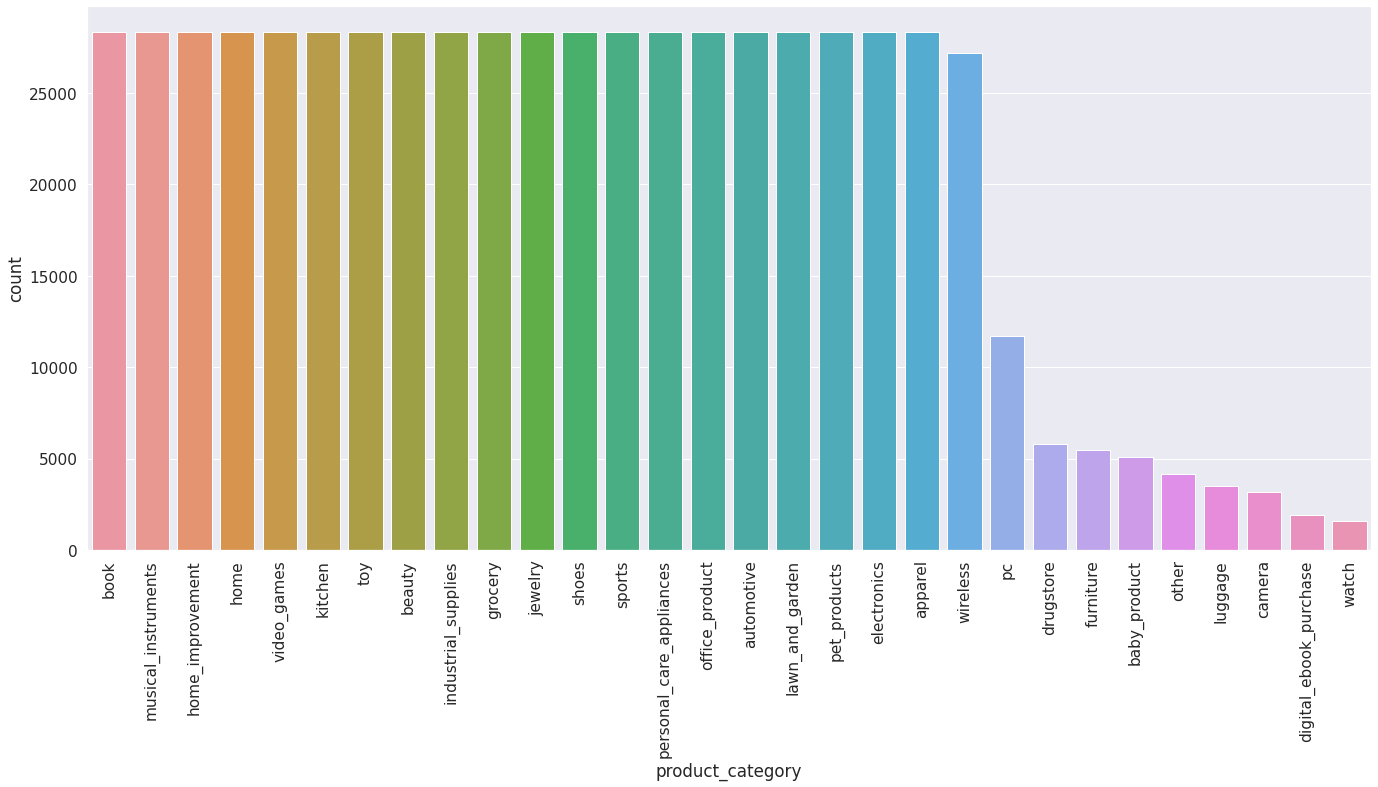

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(df_amazon_reviews["product_category"],order = df_amazon_reviews["product_category"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_amazon_reviews.isnull().sum()

product_id          0
reviewer_id         0
stars               0
product_category    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


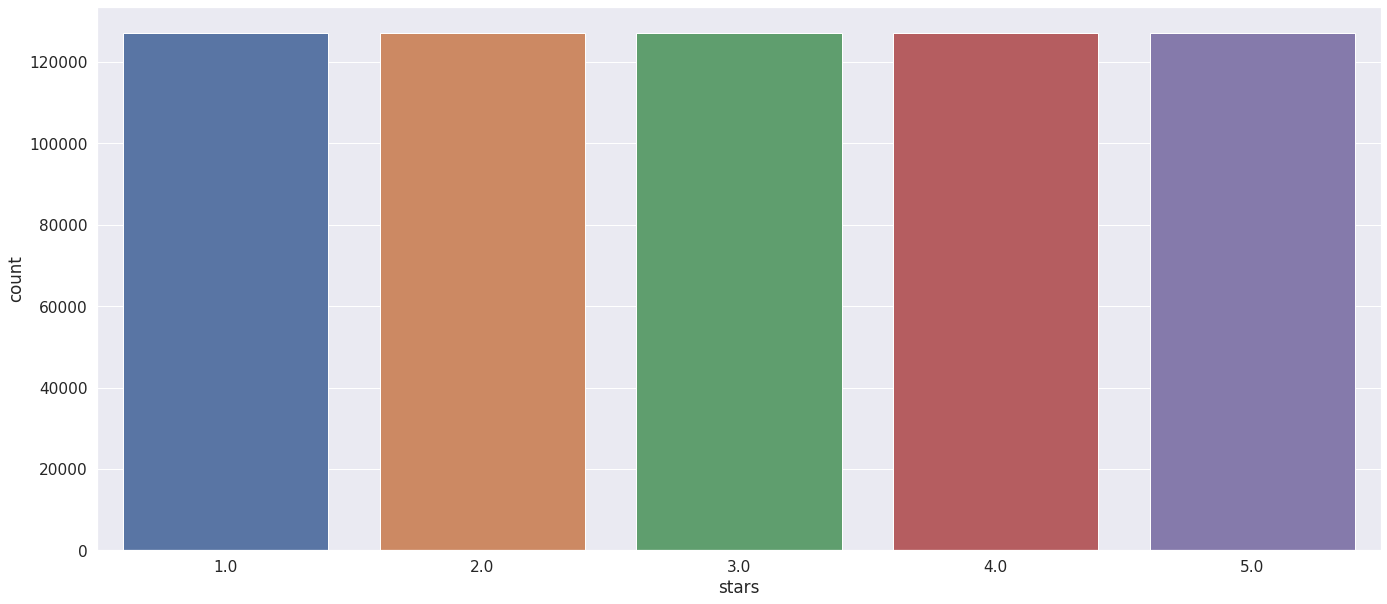

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(df_amazon_reviews["stars"])
plt.show()

In [ ]:
df_amazon_reviews.shape

(636135, 4)

In [ ]:
filtro_dataset(df_amazon_reviews,"product_id","reviewer_id","stars")
df_amazon_reviews.shape

(636135, 4)

In [ ]:
df_amazon_reviews.isnull().sum()

product_id          0
reviewer_id         0
stars               0
product_category    0
dtype: int64

# **Modelos**

Antes de continuar con los prototipos, voy a definir el tipo de sistema de recomendacion:
La informacion que tengo es el id usuario, id item y el rating, por lo tanto, el sistema sera de filtro colaborativo porque es capaz de recomendar items a un usuario a partir de su historial y el de otros usuarios con gustos similares

**Metrica de evaluacion:**

Como la variable objetivo es "ratings", es decir, un dato que el mismo usuario decidio ingresar en la base de datos. Se trata de un sistema basado en datos explicitos.
En ese caso la metrica apropiada es RMSE porque calcula la diferencia entre el rating real y el predicho agregando una penalizacion moderada para tener una nocion de los peores casos de prediccion

El primer prototipo es un algoritmo SVD basado en factorizacion de matrices.

**SVD (Singular Value Decomposition)**

Utiliza una estructura matricial en la que cada fila representa a un usuario y cada columna representa un elemento. Los elementos de esta matriz son las calificaciones que los usuarios otorgan a los elementos.

La factorización de esta matriz se realiza mediante la descomposición de valores singulares. Encuentra factores de matrices a partir de la factorización de una matriz de alto nivel (usuario-elemento-calificación). La descomposición de valor singular es un método para descomponer una matriz en otras tres matrices como se indica a continuación: 

$$
A = U*S*V^T
$$

Donde A es una matriz de utilidad mx n , U es una matriz singular izquierda ortogonal mx r , que representa la relación entre usuarios y factores latentes, S es una matriz diagonal rx r , que describe la fuerza de cada factor latente y V es un rx n matriz singular diagonal derecha, que indica la similitud entre ítems y factores latentes. Los factores latentes aquí son las características de los elementos

En mi caso, voy a usar el algoritmo proveniente de la libreria "surprise", donde las predicciones tienen la siguiente forma:

$$
p = b_{ui} + q_i^T*p_u
$$

donde:
$$
b_{ui} = μ + b_u + b_i
$$

y la formula se traduce a 
$$
r_{ui} = μ + b_u + b_i + q_i^T*p_u
$$

La anterior formula esta basada en el modelo de matriz de factorizacion:
Los modelos MF mapean usuarios e items
a un espacio de factores latentes, de dimensionalidad f, tal que
Las interacciones usuario-elemento se modelan como productos internos en
ese espacio. Por lo tanto, cada elemento i está asociado con un vector q_i y cada usuario u está asociado con un vector q_u

Para cada item i, los elementos de q_i miden el alcance del articulo para todos los factores correspondientes a los items, y obviamente los elementos de q_i seran 0 o 1.

Para cada usuario u, los elementos de p_u miden el alcance del usuario para todos los factores correspondientes a los usuarios, y obviamente los elementos de p_u seran 0 o 1.

Por ultimo, se calcula el producto escalar

$$
q_i^T*p_u
$$

lo que captura la interaccion del usuario con los items, y de eso se pueden ordenar las estimaciones de mayor a menor para recomendar items al usuario

Sin embargo, en gran parte de las observaciones, hay una gran variacion en los ratings y esto se debe a los efectos asociados con usuarios o items, conocidos como sesgos o intercepciones, independientemente de cualquier interacción. Por ejemplo, el filtro colaborativo exhibe grandes tendencias sistemáticas para algunos usuarios que dan ratings mal altos que otros, y para algunos items
para recibir ratings mas altos que otros. Después de todo, algunos items
son ampliamente percibidos como mejores (o peores) que otros

Por lo tanto, no sería apropiado predecir los ratings por una interacción de la forma:

$$
q_i^T*p_u
$$

El sistema debe intentar identificar la parte de estos valores que el usuario individual o los sesgos de los items pueden explicar, sometiendo solo la verdadera parte de interacción de los datos para factorizar el modelado. Una aproximación de primer orden del sesgo involucrado en la estimacion es la siguiente:

$$
b_{ui} = μ + b_u + b_i
$$

donde μ es el promedio general de los ratings, b_u y b_i son las desviaciones de los usuarios e items, respectivamente, del promedio

La funcion de perdida a minimizar es la siguiente:

$$
\sum_{r_{ui}}^{n} ((r_{ui} - \bar{r_{ui}})^{2} + λ(b_i^{2}+b_u^{2}+||q_i||^{2}+||p_u||^{2}))
$$

La minimización se realiza mediante un descenso de gradiente estocástico muy sencillo:

$$
b_u <=  b_u + γ(e_{ui} - λb_u)
$$

$$
b_i <=  b_i + γ(e_{ui} - λb_i)
$$

$$
p_u <=  p_u + γ(e_{ui}*q_i - λp_u)
$$

$$
q_i <=  q_i + γ(e_{ui}*p_u - λq_i)
$$

donde:

$$
e_{ui}=r_{ui} − \bar{r_{ui}}
$$

Estos pasos se realizan en todos los ratings del conjunto de entrenamiento y en una n cantidad de epocas. Las líneas de base se inicializan en 0. Los factores de usuario y de elemento se inicializan aleatoriamente de acuerdo con una distribución normal, que se puede ajustar mediante los parámetros init_mean y init_std_dev.

Tambien puedo definir la tasa de aprendizaje γ y el plazo de regularización λ. Ambos pueden ser diferentes para cada tipo de parámetro. De forma predeterminada, las tasas de aprendizaje se establecen en 0.005 y los términos de regularización se establecen en 0.02.

**Surprise**

In [ ]:
!pip install surprise

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise.accuracy import rmse

In [ ]:
reader = Reader()

In [ ]:
cols_para_entrenamiento = ["reviewer_id","product_id","stars"]

In [ ]:
data = Dataset.load_from_df(df_amazon_reviews[cols_para_entrenamiento], reader)

In [ ]:
grilla = {
    'n_epochs': [10,15,20,25], 
    'lr_all': [0.005, 0.01, 0.015, 0.02],
    'reg_all': [0.1, 0.2, 0.3, 0.4]
}

gs = GridSearchCV(SVD, grilla, measures=['rmse', 'mae'], cv=5, joblib_verbose=1)
#gs.fit(data)

mejores_puntajes = {'mae': 0.7739797724651567, 'rmse': 1.0212301517010391}
print("Mejor RMSE:",mejores_puntajes["rmse"])
print("")
print("Mejor MAE:",mejores_puntajes["mae"])

print("")
print("="*64)
print("")

mejores_hiperparametos = {'mae': {'lr_all': 0.02, 'n_epochs': 25, 'reg_all': 0.1},'rmse': {'lr_all': 0.02, 'n_epochs': 25, 'reg_all': 0.1}}
print("Mejores hiperparametros segun RMSE:",mejores_hiperparametos["rmse"])
print("")
print("Mejores hiperparametros segun MAE:",mejores_hiperparametos["mae"])

Mejor RMSE: 1.0212301517010391

Mejor MAE: 0.7739797724651567


Mejores hiperparametros segun RMSE: {'lr_all': 0.02, 'n_epochs': 25, 'reg_all': 0.1}

Mejores hiperparametros segun MAE: {'lr_all': 0.02, 'n_epochs': 25, 'reg_all': 0.1}


**Dataset codificado**
Los siguientes modelos no procesan datos alfanumericos, solamente datos numeros.
Por eso voy a codificar la columna reviewer_id y product_id

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
df_amazon_reviews_codificado = df_amazon_reviews.copy()

label_encoder_reviewers = LabelEncoder().fit(df_amazon_reviews_codificado["reviewer_id"])
label_encoder_products = LabelEncoder().fit(df_amazon_reviews_codificado["product_id"])
df_amazon_reviews_codificado["reviewer_id"] = label_encoder_reviewers.transform(df_amazon_reviews_codificado["reviewer_id"])
df_amazon_reviews_codificado["product_id"] = label_encoder_products.transform(df_amazon_reviews_codificado["product_id"])

X = df_amazon_reviews_codificado[["reviewer_id","product_id"]]
y = df_amazon_reviews_codificado["stars"]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
#X_train2 = X_train.copy()
#X_train2["stars"] = y_train.values
#X_train2.head()

Abajo estoy agregando la columna de rating al conjunto de testing para pasarlo a tipo mx.nd.array 

In [ ]:
#X_test2 = X_test.copy()
#X_test2["stars"] = y_test.values
#X_test2.head()

# **PySpark**

PySpark es una interfaz para Apache Spark en Python. No solo permite escribir aplicaciones Spark utilizando las API de Python, sino que también proporciona el shell de PySpark para analizar interactivamente sus datos en un entorno distribuido. PySpark es compatible con la mayoría de las funciones de Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) y Spark Core.

https://medium.com/@patelneha1495/recommendation-system-in-python-using-als-algorithm-and-apache-spark-27aca08eaab3

Instalamos pyspark

In [ ]:
!pip install pyspark

In [ ]:
import pyspark

In [ ]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

La celda de abajo es para definir el esquema que tendra el dataset y tambien es de tipo StructType para que sea compatible con el entorno de pyspark

In [ ]:
from pyspark.sql.types import StructType, IntegerType, DateType, StringType, StructField, FloatType

schema = StructType([
    StructField("reviewer_id", IntegerType(), False),
    StructField("product_id", IntegerType(), False),
    StructField("stars", FloatType(), False),
])

Exportamos el dataset

In [ ]:
df_amazon_reviews_ratings = df_amazon_reviews_codificado[["reviewer_id","product_id","stars"]].copy()

In [ ]:
df_amazon_reviews_ratings.to_csv("df_amazon_ratings_codificado.csv",index=False)

Cargamos el dataset desde spark

In [ ]:
ratings = spark.read.csv("df_amazon_ratings_codificado.csv", header=True, nullValue='NA', schema=schema)
ratings.show()
ratings.printSchema()

+-----------+----------+-----+
|reviewer_id|product_id|stars|
+-----------+----------+-----+
|     395490|    248015|  5.0|
|      43426|     65839|  5.0|
|      28049|     94063|  5.0|
|     141841|    154313|  5.0|
|      17695|    137122|  5.0|
|      50352|     44050|  5.0|
|      49800|     18527|  5.0|
|      48496|     80548|  5.0|
|     158920|     57852|  5.0|
|      14969|      4129|  5.0|
|     153797|     19045|  5.0|
|     181958|      7343|  5.0|
|      41151|     65621|  5.0|
|      19218|     76124|  5.0|
|     133654|    157387|  5.0|
|      40992|     21574|  5.0|
|     110966|     99394|  5.0|
|      76688|     49263|  5.0|
|      90878|    124449|  5.0|
|     141773|     62097|  5.0|
+-----------+----------+-----+
only showing top 20 rows

root
 |-- reviewer_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- stars: float (nullable = true)



In [ ]:
for column in ['reviewer_id','product_id','stars']:
    ratings = ratings.withColumn(column, ratings[column].cast('int'))
    
ratings.printSchema()

root
 |-- reviewer_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- stars: integer (nullable = true)



La funcion preview es para tener visualizar los datos de spark con pandas

In [ ]:
# function to select a few rows of data and convert to a Pandas dataframe
def preview(df, n=3):
    return pd.DataFrame(df.take(n), columns=df.columns)

In [ ]:
preview(ratings)

,reviewer_id,product_id,stars
0,395490,248015,5
1,43426,65839,5
2,28049,94063,5


Separamos los datos en train y test

In [ ]:
train, test = ratings.randomSplit([0.7, 0.3], seed=42)

Mínimos cuadrados alternos (ALS) también es un algoritmo de factorización matricial y se ejecuta de forma paralela. ALS se implementa en Apache Spark ML y se crea para problemas de filtrado colaborativo a gran escala. ALS hace un trabajo bastante bueno para resolver la escalabilidad y la escasez de los datos de ratings, y es simple y se adapta bien a conjuntos de datos muy grandes.

Algunas caracteristicas de alto nivel detrás de ALS son: 

1) Utiliza la regularizacion L2

2) ALS minimiza dos funciones de pérdida alternativamente.
Primero mantiene fija la matriz de usuario y ejecuta el descenso de gradiente con la matriz de elementos, luego mantiene fija la matriz de elementos y ejecuta el descenso de gradiente con la matriz de usuario

3) ALS ejecuta su descenso de gradiente en paralelo a través de múltiples particiones de los datos de entrenamiento subyacentes de un grupo de máquinas.

In [ ]:
from pyspark.ml.recommendation import ALS

A continuacion estoy ejecutando el primer ensayo con ALS y visualizando las predicciones

In [ ]:
# create the model
als = ALS(userCol='reviewer_id',
          itemCol='product_id',
          ratingCol='stars',
          rank=4,
          seed=42,
          nonnegative=True, coldStartStrategy="drop"
          )

# fit the model
als_model = als.fit(train)

# make predictions on the test set
als_pred = als_model.transform(test)

preview(als_pred[['reviewer_id', 'product_id', 'stars', 'prediction']])

,reviewer_id,product_id,stars,prediction
0,58406,22521,3,0.000000
1,19931,29285,2,2.298568
2,162757,36525,2,0.000434


In [ ]:
als_pred = als_pred.withColumn('diff_sq', (als_pred['stars'] - als_pred['prediction'])**2)

preview(als_pred[['stars','prediction','diff_sq']])

,stars,prediction,diff_sq
0,3,0.000000,9.000000
1,2,2.298568,0.089143
2,2,0.000434,3.998264


Abajo estoy calculando el rmse de las prediciones

In [ ]:
from pyspark.sql import functions as func

rms_calc = func.sqrt(func.mean('diff_sq'))

als_pred.dropna().select( rms_calc.alias('rmse') ).show()

+-----------------+
|             rmse|
+-----------------+
|2.371413709395441|
+-----------------+



La celda de abajo reentrena el ALS pero con los hiperparametros ya optimizados para que no tarde en ejecutar

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# The ALS instance
als = ALS(userCol='reviewer_id',
          itemCol='product_id',
          ratingCol='stars',
          seed=42,
          nonnegative=True, coldStartStrategy="drop"
          )

# The parameter grid to search
# NOTE: the parmeter lists can be reduced to two or even 
# one item if the grid search takes too long


als_paramgrid = (ParamGridBuilder()
                 .addGrid(als.rank, [2, 4])
                 .addGrid(als.maxIter, [10])
                 .addGrid(als.regParam, [0.1])
                 .addGrid(als.alpha, [2.0, 3.0])
                 .build())


# The evaluation function for determining the best model
rmse_eval = RegressionEvaluator(labelCol='stars',
                                predictionCol='prediction', 
                                metricName='rmse')

# The cross validation instance
als_cv = CrossValidator(estimator=als,
                        estimatorParamMaps=als_paramgrid,
                        evaluator=rmse_eval,
                        numFolds=3, 
                        seed=42)

# Fit the models and find the best one!
als_cv = als_cv.fit(train.dropna())

In [ ]:
als_best = als_cv.bestModel

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlc = SQLContext(sc)   

A continuacion estoy comparando el rmse del primer ensayo con el rmse del modelo optimizado

In [ ]:
als_pred_best = als_best.transform(test)

als_best_rmse = sqlc.createDataFrame([ (rmse_eval.evaluate(als_pred.dropna()), 
                                        rmse_eval.evaluate(als_pred_best.dropna())) ],
                                     ['rmse_original', 'rmse_crossval'])

als_best_rmse.show()

+-----------------+-----------------+
|    rmse_original|    rmse_crossval|
+-----------------+-----------------+
|2.371413708525819|2.371413708525819|
+-----------------+-----------------+



**Tensorflow**

TensorFlow Recommenders (TFRS) es una biblioteca para compilar modelos de sistemas de recomendaciones.

Facilita el flujo de trabajo completo de la compilación de sistemas de recomendación: preparación de datos, formulación de modelos, entrenamiento, evaluación e implementación.

Se basa en Keras y se enfoca en lograr una curva de aprendizaje suave manteniendo flexibilidad para compilar modelos complejos.

TFRS posibilita lo siguiente:
Compilar y evaluar modelos de recuperación de recomendación
Incorporar libremente información de contexto, artículos y usuarios en los modelos de recomendación
Entrenar modelos para varias tareas que permitan optimizar varios objetivos de recomendación en conjunto

Instalamos la libreria tensorflow-recommenders

In [ ]:
!pip install -q tensorflow-recommenders
#!pip install -q --upgrade tensorflow-datasets

Importamos la libreria

In [ ]:
import tensorflow_recommenders as tfrs

In [ ]:
import tensorflow as tf

In [ ]:
#import tensorflow_datasets as tfds

En este caso voy a usar el dataset de reviews sin ninguna transformacion

In [ ]:
df_amazon_reviews.head()

,product_id,reviewer_id,stars,product_category
12357213,B00PR79OGC,A2XPA2UMINHK7S,5.0,kitchen
199203,0411670,0231030,5.0,home_improvement
199205,0591490,0148753,5.0,baby_product
199206,0967755,0757527,5.0,luggage
199207,0860943,0093537,5.0,home


La celda de abajo convierte el datframe pandas a dataframe tensorflow

In [ ]:
ds = tf.data.Dataset.from_tensor_slices((df_amazon_reviews[["product_id","reviewer_id"]].values,df_amazon_reviews[["stars"]].values))

A continuacion hice un mapeo para convertir el dataframe al tipo MapDataset

In [ ]:
ratings = ds.map(lambda x,y: {
    "item_id": x[0],
    "user_id": x[1],
    "user_rating": y
})

Con el mapdataset puede mezclar los datos y hacer la separacion de conjuntos de entrenamiento y pruebas

In [ ]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

La celda de abajo crea las listas de usuarios e items unicos para despues definir la dimension de salida de la capa de incrustacion

In [ ]:
item_ids = ratings.batch(1_000_000).map(lambda x: x["item_id"])
user_ids = ratings.batch(1_000_000).map(lambda x: x["user_id"])

unique_item_ids = np.unique(np.concatenate(list(item_ids)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

La clase RankingModel define la arquitectura del modelo, que funciona igual a la matriz de factorizacion, la diferencia es que puede transformar las entradas de tipo string a vectores de incrustacion, sin codificar los datos

In [ ]:
class RankingModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    embedding_dimension = 32

    # Atributo de incrustaciones de usuarios
    self.user_embeddings = tf.keras.Sequential([

      #Esta capa traduce un conjunto de cadenas arbitrarias en un resultado entero a través de una búsqueda basada en tablas, con manejo opcional de vocabulario.                                          
      tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=unique_user_ids, mask_token=None),

      #Esta capa transforma los enteros en vectores para que la red neuronal pueda manejar los datos en valores bajos y en distribucion uniforme
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)

    ])

    # Atributo de incrustaciones de items
    self.item_embeddings = tf.keras.Sequential([

      #Esta capa traduce un conjunto de cadenas arbitrarias en un resultado entero a través de una búsqueda basada en tablas, con manejo opcional de vocabulario.                                 
      tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=unique_item_ids, mask_token=None),

      #Esta capa transforma los enteros en vectores para que la red neuronal pueda manejar los datos en valores bajos y en distribucion uniforme
      tf.keras.layers.Embedding(len(unique_item_ids) + 1, embedding_dimension)

    ])

    # Compute predictions.
    self.ratings = tf.keras.Sequential([
                                        
      # Learn multiple dense layers.
      tf.keras.layers.Dense(256, activation="relu"),

      tf.keras.layers.Dense(64, activation="relu"),

      # Make rating predictions in the final layer.
      tf.keras.layers.Dense(1)
    ])

  def call(self, inputs):

    user_id, item_id = inputs

    user_embedding = self.user_embeddings(user_id)
    item_embedding = self.item_embeddings(item_id)

    return self.ratings(tf.concat([user_embedding, item_embedding], axis=1))

La funcion de perdida es MSE y la metrica es RMSE

In [ ]:
from typing import Dict, Text

La clase TFSystemRecommender se encarga de definir el modelo como atributo para despues ir computando la funcion de perdida

In [ ]:
class TFSystemRecommender(tfrs.models.Model):

  def __init__(self):
    super().__init__()
    
    self.ranking_model: tf.keras.Model = RankingModel()

    self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
      loss = tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor: rating_predictions = self.ranking_model((features["user_id"], features["item_id"]));return self.task(labels=features["user_rating"], predictions=rating_predictions);

El optimizador del modelo es AdaGrad (descenso por gradiente estocastico adaptativo) porque es capaz de redefinir la taza de aprendizaje usando el historial del entrenamiento y ahorra tiempo de ejecucion al tomar puntos aleatorios de la funcion de perdida para tomar el mas bajo.

In [ ]:
model = TFSystemRecommender()
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

In [ ]:
tf.random.set_seed(42)
cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()

Entrenamos...

In [ ]:
tf.random.set_seed(42)
model.fit(cached_train, epochs=30)

Epoch 1/30
10/10 [==============================] - 7s 147ms/step - root_mean_squared_error: 2.6102 - loss: 6.0875 - regularization_loss: 0.0000e+00 - total_loss: 6.0875
Epoch 2/30
10/10 [==============================] - 1s 95ms/step - root_mean_squared_error: 0.4947 - loss: 0.2386 - regularization_loss: 0.0000e+00 - total_loss: 0.2386
Epoch 3/30
10/10 [==============================] - 1s 98ms/step - root_mean_squared_error: 0.3902 - loss: 0.1506 - regularization_loss: 0.0000e+00 - total_loss: 0.1506
Epoch 4/30
10/10 [==============================] - 1s 96ms/step - root_mean_squared_error: 0.3612 - loss: 0.1302 - regularization_loss: 0.0000e+00 - total_loss: 0.1302
Epoch 5/30
10/10 [==============================] - 1s 91ms/step - root_mean_squared_error: 0.3556 - loss: 0.1264 - regularization_loss: 0.0000e+00 - total_loss: 0.1264
Epoch 6/30
10/10 [==============================] - 1s 90ms/step - root_mean_squared_error: 0.3542 - loss: 0.1255 - regularization_loss: 0.0000e+00 - tota

Evaluacion

In [ ]:
tf.random.set_seed(42)
model.evaluate(cached_test, return_dict=True)

5/5 [==============================] - 5s 179ms/step - root_mean_squared_error: 0.5488 - loss: 0.3057 - regularization_loss: 0.0000e+00 - total_loss: 0.3057


{'loss': 0.3255203366279602,
 'regularization_loss': 0,
 'root_mean_squared_error': 0.5487698316574097,
 'total_loss': 0.3255203366279602}

**Seleccion de modelo**

Todos los sistemas de recomendacion tienen estructura similar, pero yo elijo el de tensorflow porque a diferencia de otros:

* No necesito codificar los ids de usuarios e items para entrenar y predecir
* Tuve menor RMSE considerable
* Es robusto para los usuarios e items desconocidos
* El tiempo de ejecucion fue muy corto

Objetivo 2: **Modelado de temas**

Quiero crear un modelo para descubrir patrones o palabras claves en las malas y buenas criticas, esto es con el objetivo de saber o enterarse porque algunos productos tienen 5 estrellas y porque otros tienen 1 estrella.
Para ser mas concreto, mi intencion es crear una lista de temas de las malas criticas para interpretar su origen y ayudar al negocio, lo mismo con las buenas criticas.

Tengo pensado hacer esto con el modelo Latent Dirichlet Allocation

**Latent Dirichlet Allocation (LDA):**

Es un modelo de probabilidades generativo que intenta encontrar grupos de palabras que aparecen juntos con frecuencia en distintos documentos. Estas palabras que aparecen con frecuencia representan nuestros temas, suponiendo que cada documento es una mezcla de diferentes palabras.
La entrada de un modelo LDA es una "bolsa de palabras", que despues se descompone es 2 nuevas matrices

* Un documento para la matriz de temas
* Una palabra para la matriz de temas

El LDA descompone la bolsa de palabras de tal manera que si multiplicamos estas 2 matrices podriamos reproducir la entrada, la matriz de bolsa de palabras, con la mas baja probabilidad de error

El unico inconveniente es que necesito definir el numero de temas, que es un hiperparametro

Para esta tarea voy a utilizar el corpus normalizado que es resultado del preprocesamiento del principio, y para crear la bolsa de palabras voy a utilizar el CountVectorizer de scikit-learn

En caso de que las urls no funcionen para cargar los datasets, por favor reemplazarlos por los archivos de este repositorio
https://github.com/MaximilianoAlarcon/Acamica_Proyecto_3_Amazon

In [176]:
columnas_necesarias = ["review_title_body_lemm","stars"]

In [177]:
df_train = pd.read_json("https://softpetsas.com/amazon_train_lemm.json")
df_train = df_train[columnas_necesarias]

df_test = pd.read_json("https://softpetsas.com/amazon_test_lemm.json")
df_test = df_test[columnas_necesarias]

df_dev = pd.read_json("https://softpetsas.com/amazon_dev_lemm.json")
df_dev = df_dev[columnas_necesarias]

df_amazon_reviews = pd.concat([df_train, df_test, df_dev])
del df_train, df_test, df_dev;

df_amazon_reviews.head()

,review_title_body_lemm,stars
0,television nevir bueno ka pantalla mes recibi...,1
1,dinero tirado basura compra horrible tener co...,1
2,llegar unidad obligar comprar obligar comprar ...,1
3,producto recibir entrar descalificar vendedor...,1
4,devuelto llegar co talla equivocado,1


In [178]:
from nltk.corpus import stopwords

In [179]:
from sklearn.feature_extraction.text import CountVectorizer

count_clase_1 = CountVectorizer(stop_words=stopwords.words('spanish'), max_df = .1, max_features = 5000)

count_clase_5 = CountVectorizer(stop_words=stopwords.words('spanish'), max_df = .1, max_features = 5000)

In [180]:
x_clase_1 = count_clase_1.fit_transform(df_amazon_reviews[df_amazon_reviews["stars"] == 1]["review_title_body_lemm"].values)

In [181]:
x_clase_5 = count_clase_5.fit_transform(df_amazon_reviews[df_amazon_reviews["stars"] == 5]["review_title_body_lemm"].values)

En las instancias de CountVectorizer he establecido la frecuencia maxima del documento de palabras que deben ser consideradas al 10% (max_df = .1) para excluir las palabras que aparecen con demasiada frecuencia en los documentos. El razonamiento que hay detras de la eliminacion de palabras que aparecen con frecuencia es que estas pueden ser palabras comunes que aparecen en todos los documentos y, por lo tanto, estan menos relacionadas con una categoria de tema especifica de un documento determinado.

Ademas, he limitado el numero de palabras que se deben considerar a las 5000 palabras que aparecen con mayor frecuencia (max_features = 5000), para limitar la dimensionalidad de este conjunto de datos y que mejore la inferencia llevada a cabo por el LDA

A continuacion voy a ajustar el LDA para las dos bolsas de palabras

In [182]:
from sklearn.decomposition import LatentDirichletAllocation

lda_clase_1 = LatentDirichletAllocation(n_components = 5, random_state = 42, learning_method = 'batch')

temas_clase_1 = lda_clase_1.fit(x_clase_1)

In [183]:
lda_clase_5 = LatentDirichletAllocation(n_components = 5, random_state = 42, learning_method = 'batch')

temas_clase_5 = lda_clase_5.fit(x_clase_5)

Al ajustar learning_method='batch', dejamos que el estimador LDA realice su estimacion basandose en todos los datos de entrenamiento disponibles (la matriz de bolsa de palabras) en una iteracion, lo cual es mas lento que el metodo de aprendizaje "online" alternativo pero puede producir resultados mas precisos.

Ajustar learning_method='online' es lo mismo que el aprendizaje de minilotes

Despues de ajustar el LDA puedo acceder al atributo components_

In [184]:
lda_clase_1.components_.shape

(5, 5000)

In [185]:
lda_clase_5.components_.shape

(5, 5000)

Para analizar los resultados voy a imprimir las 10 palabras mas importantes para cada uno de los temas.
Los valores de relevancia estan en orden creciente, por lo tanto necesito ordenar la matriz topic en orden inverso para imrimir las 10 palabras mas importantes

**Temas en la clase 1**

In [186]:
n_top_words = 10
feature_names = count_clase_1.get_feature_names()
for topic_idx, topic in enumerate(lda_clase_1.components_):
  print("Tema %d:" % (topic_idx + 1))
  print(" ".join([ feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1] ]))

Tema 1:
mes durar dejar batería cargar amazon problema recomendar año encender
Tema 2:
venir roto foto caja romper gustar pieza recomendar plástico abrir
Tema 3:
color timo precio estafa servir poner conectar salir imagen valer
Tema 4:
pantalla pequeño servir quedar recomendar valer dinero pegar protector basura
Tema 5:
recibir esperar vendedor pedido amazon dinero pedir mes entrega paquete


A simple vista parece que:

* El tema 1 abarca criticas a productos con poca durabilidad
* El tema 2 abarca criticas a productos que llegan rotos
* El tema 3 abarca criticas a productos que cuestan mas de lo que deberian
* El tema 4 abarca criticas a productos que no son tal como se ofrecen
* El tema 5 abarca criticas a productos que tardaron mucho en llegar a los clientes

**Temas en la clase 5**

In [187]:
n_top_words = 10
feature_names = count_clase_5.get_feature_names()
for topic_idx, topic in enumerate(lda_clase_5.components_):
  print("Tema %d:" % (topic_idx + 1))
  print(" ".join([ feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1] ]))

Tema 1:
cumplir rápido compra funcionar correcto perfectamente excelente llegar fácil función
Tema 2:
comprar perfectamente compra funda original volver marca funcionar móvil llevar
Tema 3:
luz funcionar pequeño cable fácil ver poner coche tamaño quedar
Tema 4:
bonito encantar genial gustar quedar regalo color libro precioso encantado
Tema 5:
cómodo práctico genial sonido pequeño venir juego útil relación fácil


A simple vista parece que:

* El tema 1 abarca criticas a productos que funcionan perfecto y cumplen las expectativas
* El tema 2 abarca criticas a productos que satisfacen la compra
* El tema 3 abarca criticas a productos con buena compatibilidad 
* El tema 4 abarca criticas a productos agradables visualmente
* El tema 5 abarca criticas a productos agradables con respecto a la experiencia de usuario y la usabilidad